# AIVLE스쿨 2차 미니프로젝트: 신규 아파트 주차 수요 예측

<img src = "https://github.com/Jangrae/img/blob/master/parking.png?raw=true" width=800, align="left"/>

# 단계 2: 탐색적 데이터 분석

## [미션]

단계1 에서 생성한 데이터에 대해서 탐색적 분석을 수행합니다.

1) 단변량 분석
    - 숫자형, 범주형 변수에 맞게 데이터를 탐색하며 비즈니스적 의미를 파악합니다.
2) 이변량 분석
    - 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
    - 범주형 변수 → 실차량수 관계를 분석합니다.
3) 전처리(추가)
    - 범주형 변수 중에는 범줏값 개수가 적은 범주들은 유사한 범주끼리 묶어 봅니다.
    - 불필요한 변수를 제거합니다.

## 1. 환경설정

### (1) 로컬 수행(Anaconda)

- project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [10]:
# 기본 경로
path = ''

### (2) 구글 콜랩 수행

- 구글 콜랩을 사용중이면 구글 드라이브를 연결합니다.

In [12]:
# 구글 드라이브 연결, 패스 지정
import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    path = '/content/drive/MyDrive/project/'

### (3) 한글 폰트 표시용 라이브러리 설치

In [14]:
# 한글 표시를 위한 라이브러리 설치
!pip install koreanize_matplotlib -q

### (4) 라이브러리 불러오기

In [16]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import scipy.stats as spst

import joblib
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

### (5) 데이터 불러오기

- joblib.dump() 함수를 사용해 이전에 저장했던 base_data1.pkl 파일을 읽어옵니다.
- 읽어온 데이터를 apart 데이터프레임으로 선언합니다.

#### 1) 데이터 불러오기

In [19]:
# 파일 불러오기
apart = joblib.load(path+'base_data1.pkl')

#### 2) 기본 정보 조회

In [21]:
apart.head()


,단지코드,총세대수,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,1030,3040,4050,5060,6070,7080,80200,임대보증금,임대료
0,C0001,78,서울,2013,계단식,개별가스난방,전체동 설치,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,C0002,35,서울,2013,복도식,개별가스난방,전체동 설치,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,C0003,88,서울,2013,계단식,개별가스난방,전체동 설치,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,C0004,477,서울,2014,복도식,지역난방,전체동 설치,943,47058.9273,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,C0006,15,서울,2013,복도식,개별가스난방,전체동 설치,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333


In [22]:
apart.tail()

,단지코드,총세대수,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,1030,3040,4050,5060,6070,7080,80200,임대보증금,임대료
340,C0354,1485,대전충남,1993,복도식,중앙난방,전체동 설치,298,64622.2500,1181,298,0,6,0,0,0,7.595571e+06,104975.714286
341,C1354,1386,대전충남,1993,복도식,중앙가스난방,전체동 설치,258,57616.8100,1071,298,0,17,0,0,0,8.092875e+06,111848.750000
342,C0356,956,경기,1994,복도식,지역가스난방,전체동 설치,243,37398.7200,956,0,0,0,0,0,0,9.931000e+06,134540.000000
343,C0358,120,강원,2020,복도식,개별가스난방,전체동 설치,47,5581.8024,66,54,0,0,0,0,0,2.515500e+06,50040.000000
344,C0359,447,대구경북,1994,복도식,중앙유류난방,전체동 설치,78,19383.4100,149,298,0,0,0,0,0,7.628000e+06,125010.000000


In [23]:
apart.describe()

,총세대수,준공연도,실차량수,총면적,1030,3040,4050,5060,6070,7080,80200,임대보증금,임대료
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,3.450000e+02,345.000000
mean,546.759420,2007.713043,555.431884,37282.661962,45.837681,169.513043,147.455072,132.889855,1.852174,16.895652,34.515942,2.382737e+07,197729.050210
std,432.359538,7.261036,374.640474,29588.197927,161.133746,222.935074,216.675593,252.947082,32.771294,76.441995,116.975949,2.247481e+07,158760.777669
min,1.000000,1992.000000,21.000000,68.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,178.000000,2003.000000,258.000000,11293.832100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.272491e+07,112905.000000
50%,491.000000,2008.000000,498.000000,32190.360000,0.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.930850e+07,172000.000000
75%,853.000000,2013.000000,822.000000,56189.979600,0.000000,298.000000,264.000000,150.000000,0.000000,0.000000,0.000000,2.837700e+07,227564.000000
max,2289.000000,2022.000000,1657.000000,150126.863200,1181.000000,1429.000000,1258.000000,1444.000000,608.000000,756.000000,850.000000,1.898219e+08,950305.000000


In [24]:

apart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   단지코드     345 non-null    object 
 1   총세대수     345 non-null    int64  
 2   지역       345 non-null    object 
 3   준공연도     345 non-null    int64  
 4   건물형태     345 non-null    object 
 5   난방방식     345 non-null    object 
 6   승강기설치여부  345 non-null    object 
 7   실차량수     345 non-null    int64  
 8   총면적      345 non-null    float64
 9   1030     345 non-null    int64  
 10  3040     345 non-null    int64  
 11  4050     345 non-null    int64  
 12  5060     345 non-null    int64  
 13  6070     345 non-null    int64  
 14  7080     345 non-null    int64  
 15  80200    345 non-null    int64  
 16  임대보증금    345 non-null    float64
 17  임대료      345 non-null    float64
dtypes: float64(3), int64(10), object(5)
memory usage: 48.6+ KB


## 2. 기본 분석

- 기술통계정보, 결측치 확인 등 기본 분석을 수행합니다.

In [26]:
apart.describe()


,총세대수,준공연도,실차량수,총면적,1030,3040,4050,5060,6070,7080,80200,임대보증금,임대료
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,3.450000e+02,345.000000
mean,546.759420,2007.713043,555.431884,37282.661962,45.837681,169.513043,147.455072,132.889855,1.852174,16.895652,34.515942,2.382737e+07,197729.050210
std,432.359538,7.261036,374.640474,29588.197927,161.133746,222.935074,216.675593,252.947082,32.771294,76.441995,116.975949,2.247481e+07,158760.777669
min,1.000000,1992.000000,21.000000,68.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,178.000000,2003.000000,258.000000,11293.832100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.272491e+07,112905.000000
50%,491.000000,2008.000000,498.000000,32190.360000,0.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.930850e+07,172000.000000
75%,853.000000,2013.000000,822.000000,56189.979600,0.000000,298.000000,264.000000,150.000000,0.000000,0.000000,0.000000,2.837700e+07,227564.000000
max,2289.000000,2022.000000,1657.000000,150126.863200,1181.000000,1429.000000,1258.000000,1444.000000,608.000000,756.000000,850.000000,1.898219e+08,950305.000000


In [27]:
apart.isna().sum()

단지코드       0
총세대수       0
지역         0
준공연도       0
건물형태       0
난방방식       0
승강기설치여부    0
실차량수       0
총면적        0
1030       0
3040       0
4050       0
5060       0
6070       0
7080       0
80200      0
임대보증금      0
임대료        0
dtype: int64

## 3. 단변량 분석

- 주요 변수들을 연속형, 범주형으로 구분하여 데이터 분포를 살펴보며 비즈니스적인 의미를 파악합니다.
    - 연속형: '실차량수', '총세대수', '총면적', '준공연도', '임대료', '임대보증금'
    - 범주형: '지역', '건물형태', '난방방식', '승강기설치여부'
- 전용면적구간은 pd.melt() 함수를 사용해 pivot을 해제한 후 분석합니다.

### (1) 연속형 변수

- 대상: '실차량수', '총세대수', '총면적', '준공연도', '임대료', '임대보증금'
- 기술통계, Histogram, Boxplot 등을 사용해 데이터 분포를 파악합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [30]:
# 함수 만들기
def univariate_continuous(apart,name):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.histplot(apart[name],kde=True,bins=10)
    plt.subplot(1,2,2)
    sns.boxplot(apart[name])
    plt.show()


#### 1) 실차량수

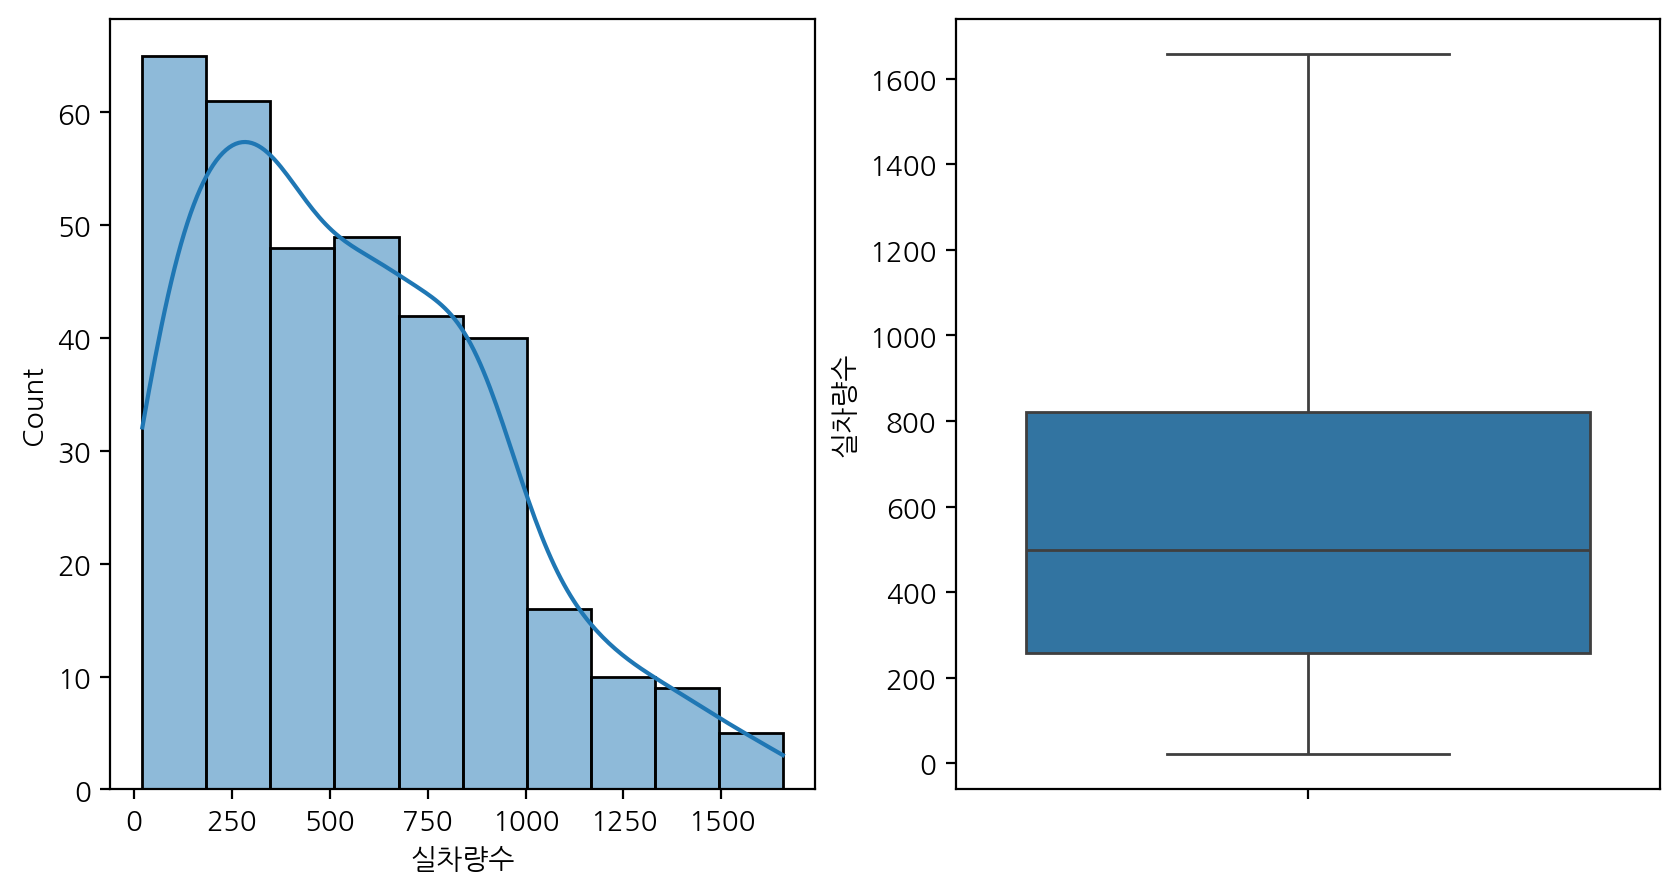

In [32]:
univariate_continuous(apart,'실차량수')


#### 2) 총세대수

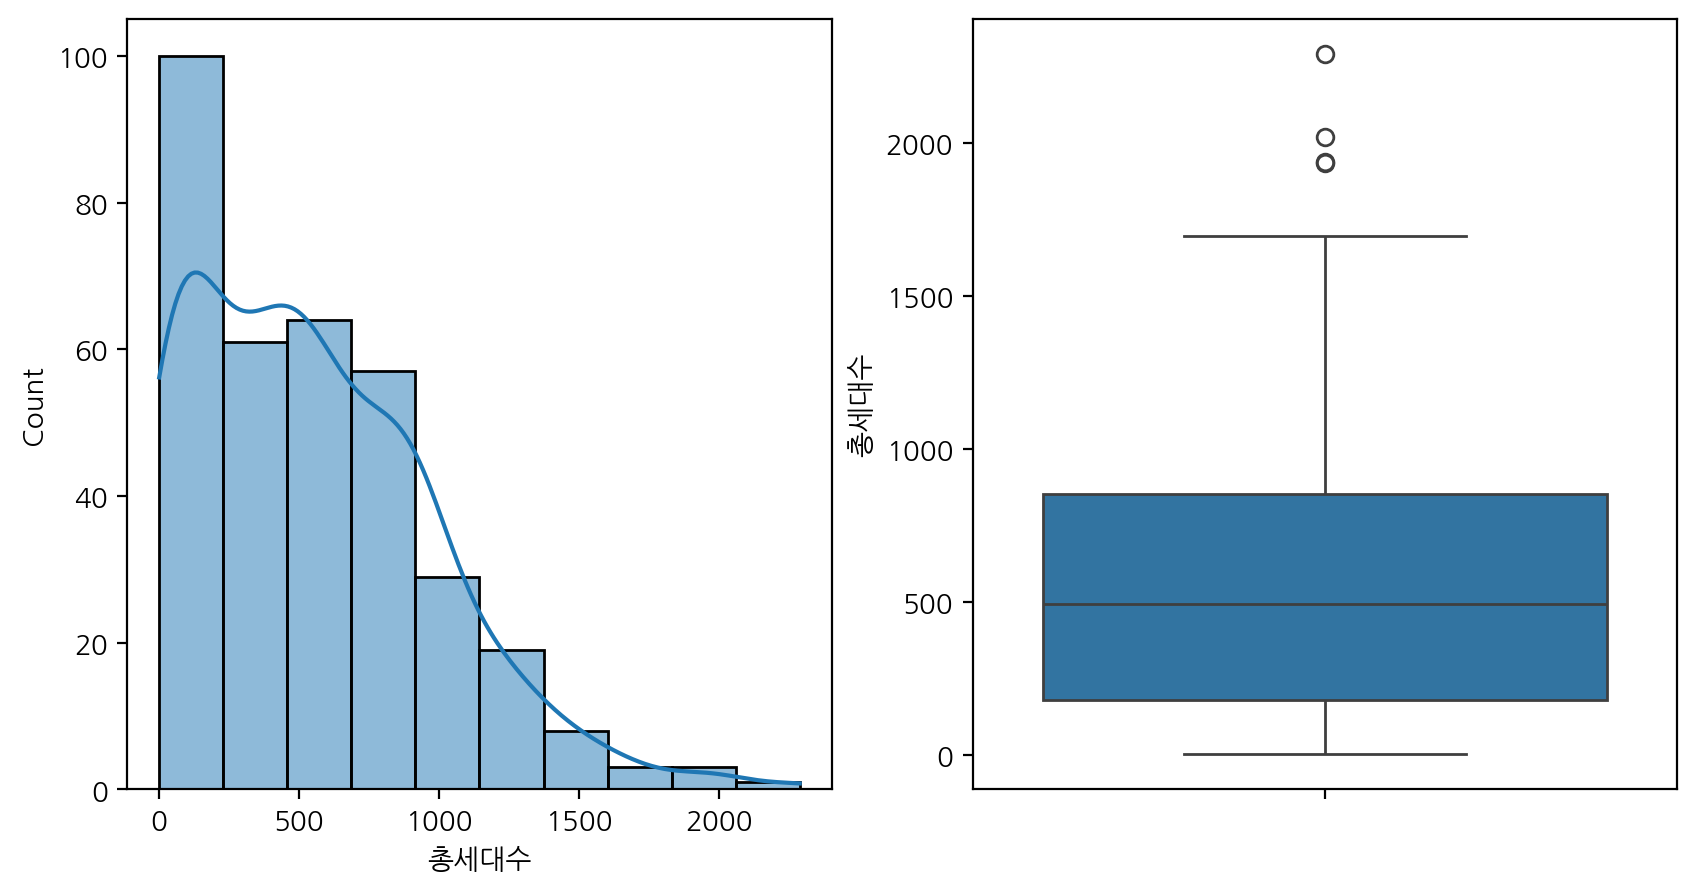

In [34]:

univariate_continuous(apart,'총세대수')

#### 3) 총면적

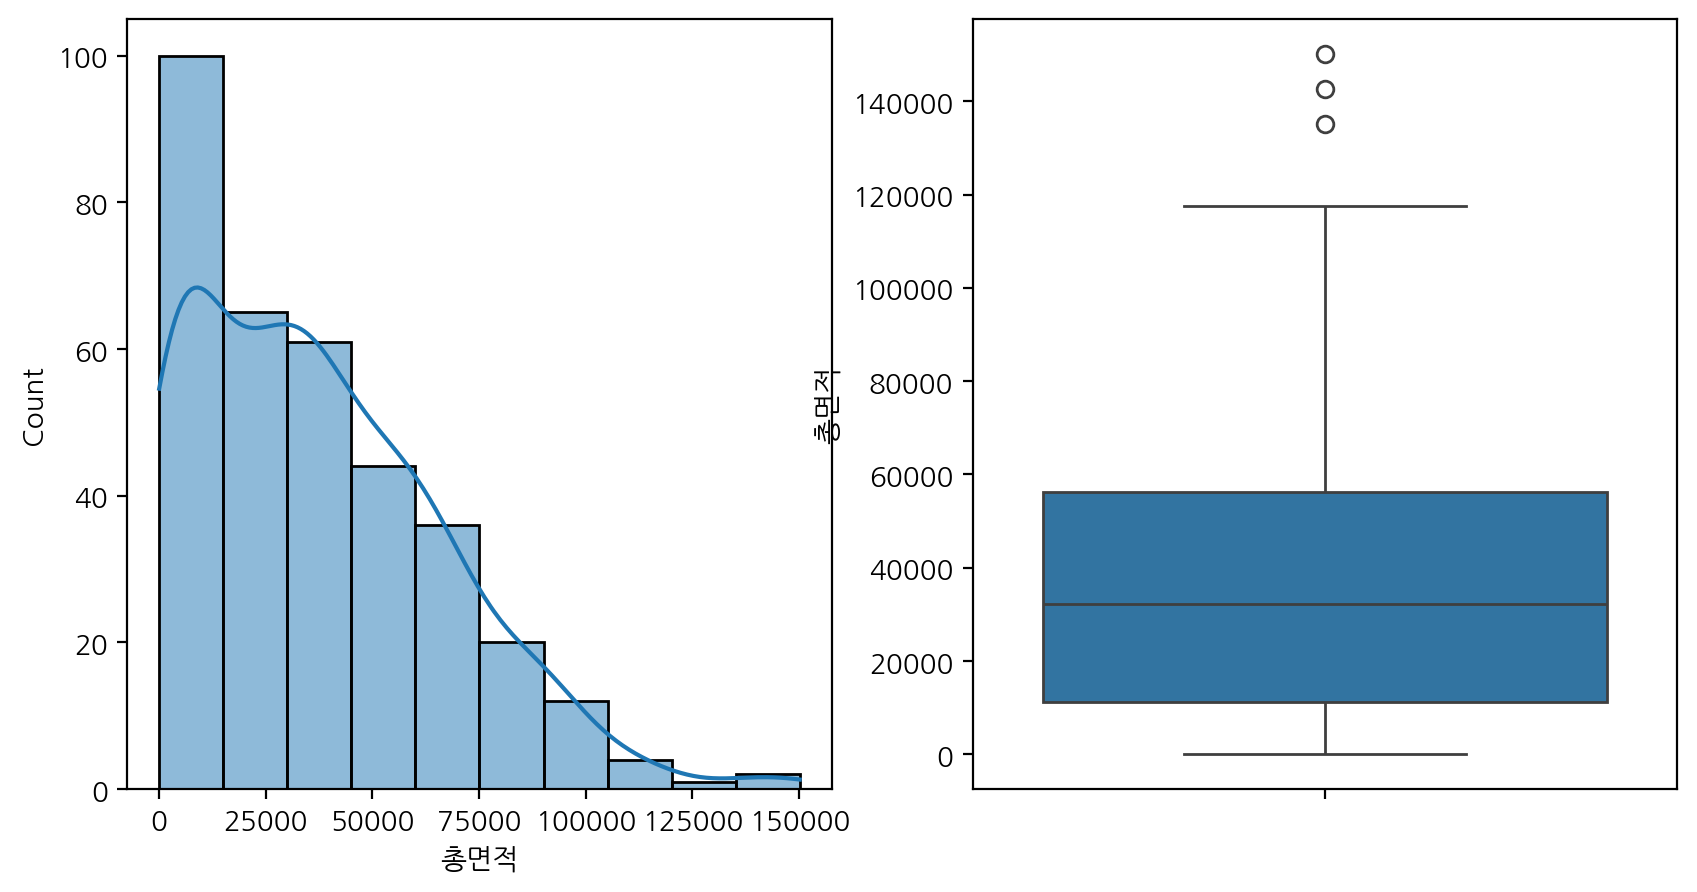

In [36]:
univariate_continuous(apart,'총면적')


#### 4) 준공연도

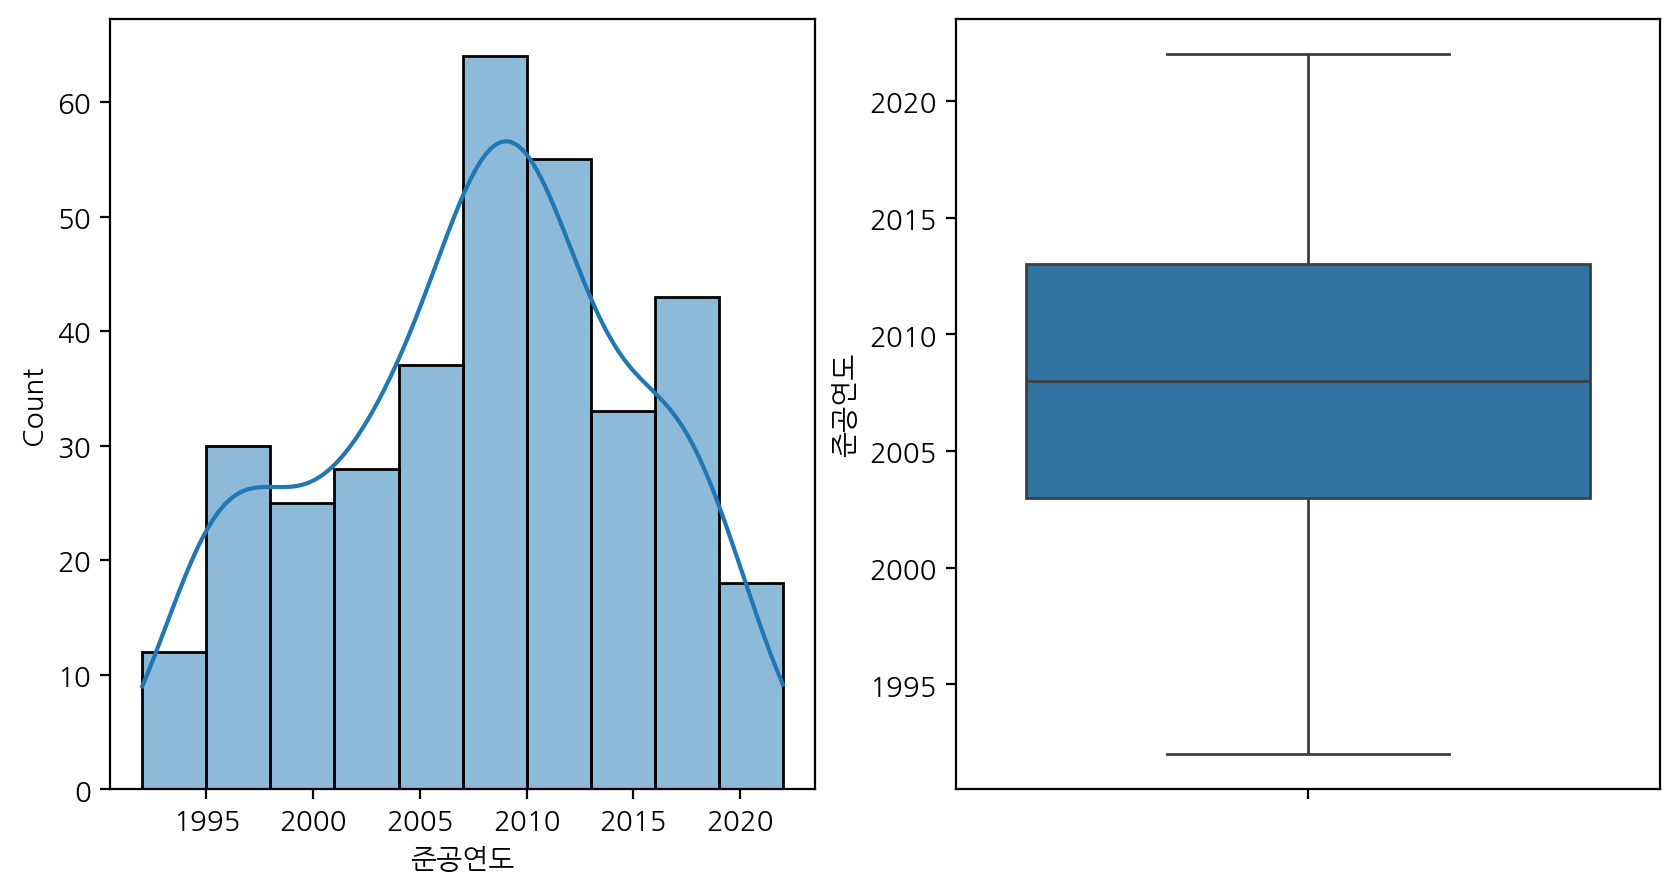

In [38]:
univariate_continuous(apart,'준공연도')


#### 5) 임대료

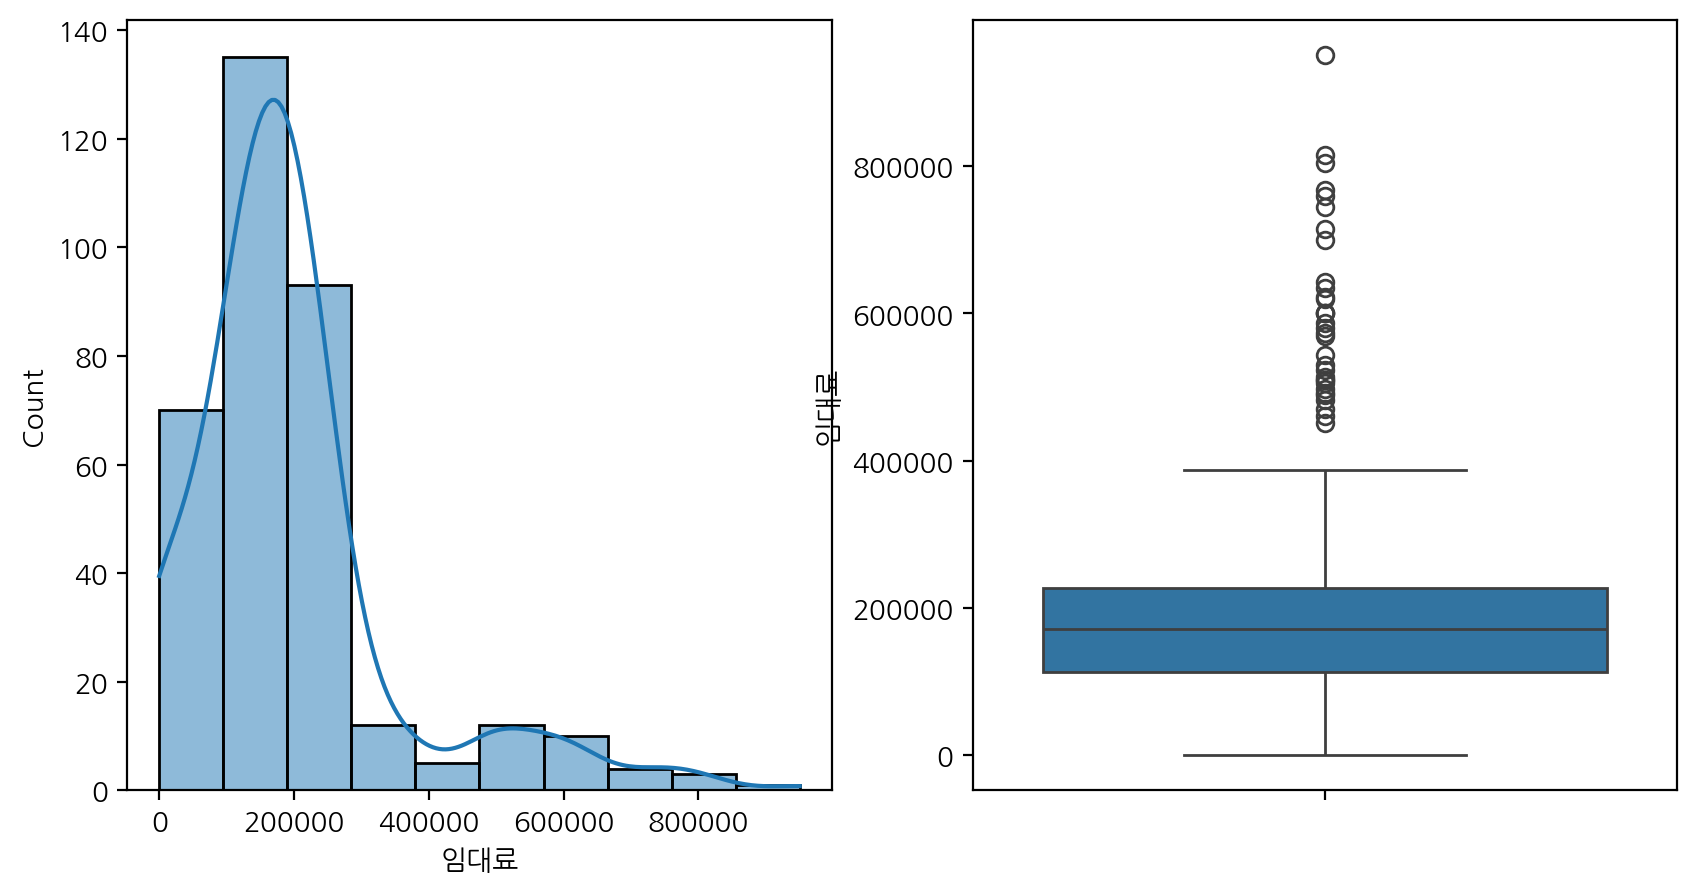

In [40]:

univariate_continuous(apart,'임대료')

#### 6) 임대보증금

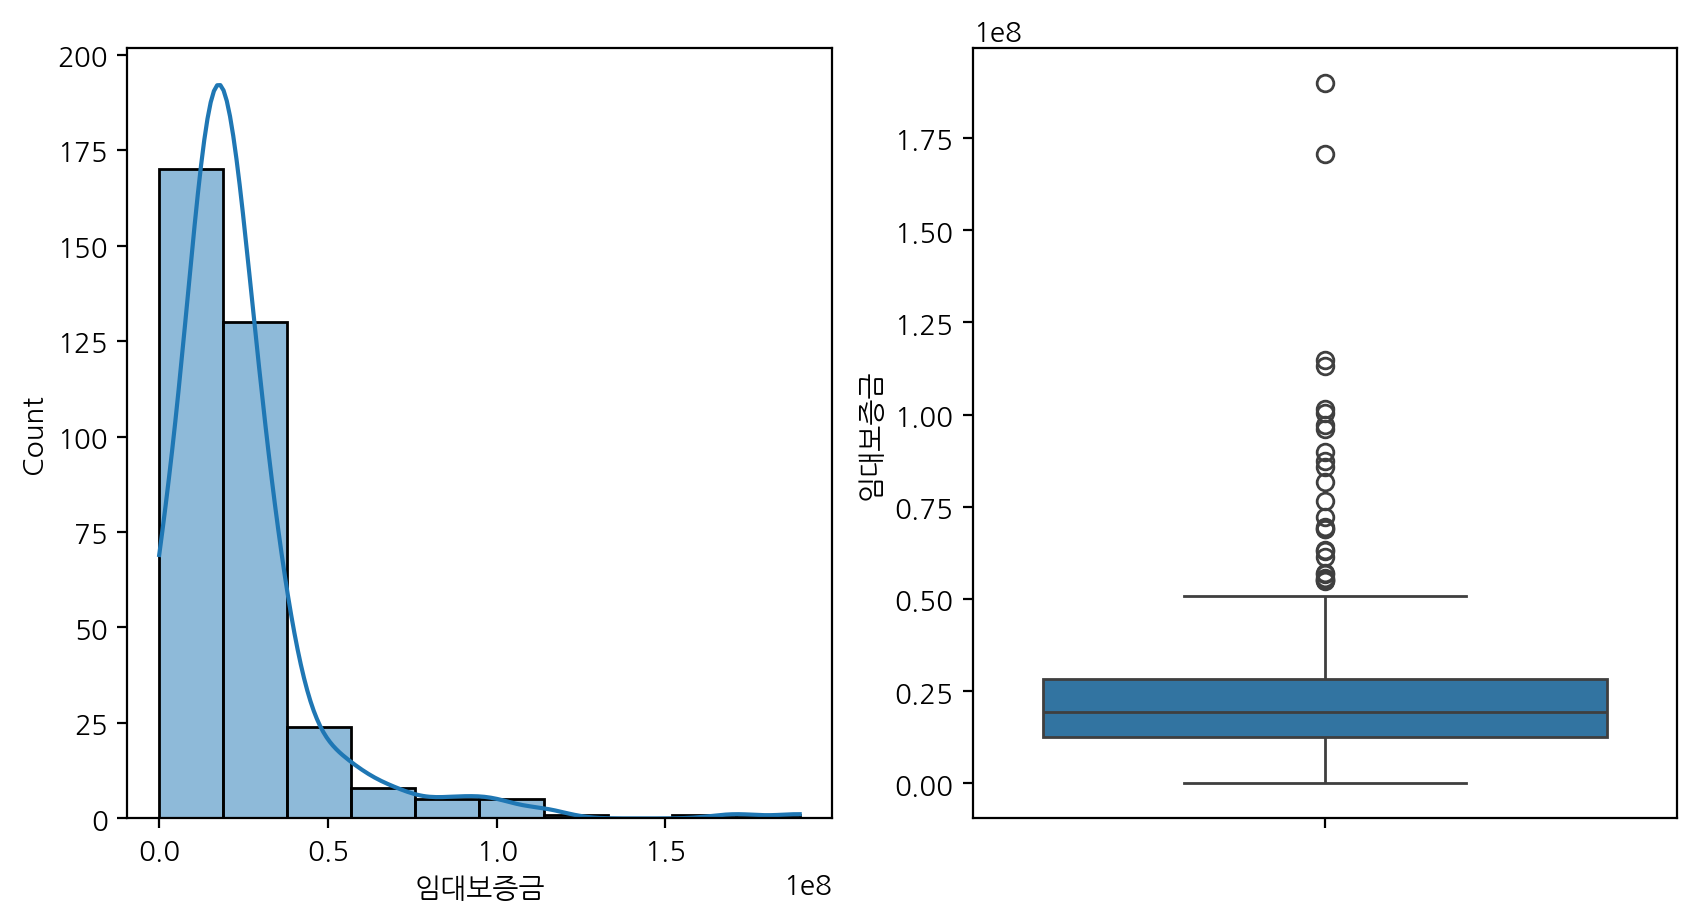

In [42]:
univariate_continuous(apart,'임대보증금')


### (2) 범주형 변수

- 대상: '지역', '건물형태', '난방방식', '승강기설치여부'
- sns.countplot() 함수 등을 사용해 데이터 분포를 확인합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [44]:
# 함수 만들기
def plot_categori(target, df):
    plt.figure(figsize=(8, 4))
    
    # Countplot
    sns.countplot(data=df, x=target)
    
    plt.title(f"Distribution of '{target}'")
    plt.xlabel(target)
    plt.ylabel('Count')
    
    plt.xticks(rotation=45)  # x축 레이블 회전
    plt.tight_layout()  # 레이아웃 조정
    plt.show()  # 시각화 출력

In [45]:
# 함수 만들기
def apart_anls2(x): 
    
    #그래프 전체 크기
    plt.figure(figsize=(14,7))
    
    #그래프 : countplot
    ax = sns.countplot(data=apart, x=x, palette='Set2')

    for p in ax.patches:
        ax.annotate(str(p.get_height()), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom')
    
    plt.xlabel(f'{x}')
    plt.grid(axis='y', linestyle='--')
    
    plt.show()

#### 1) 지역

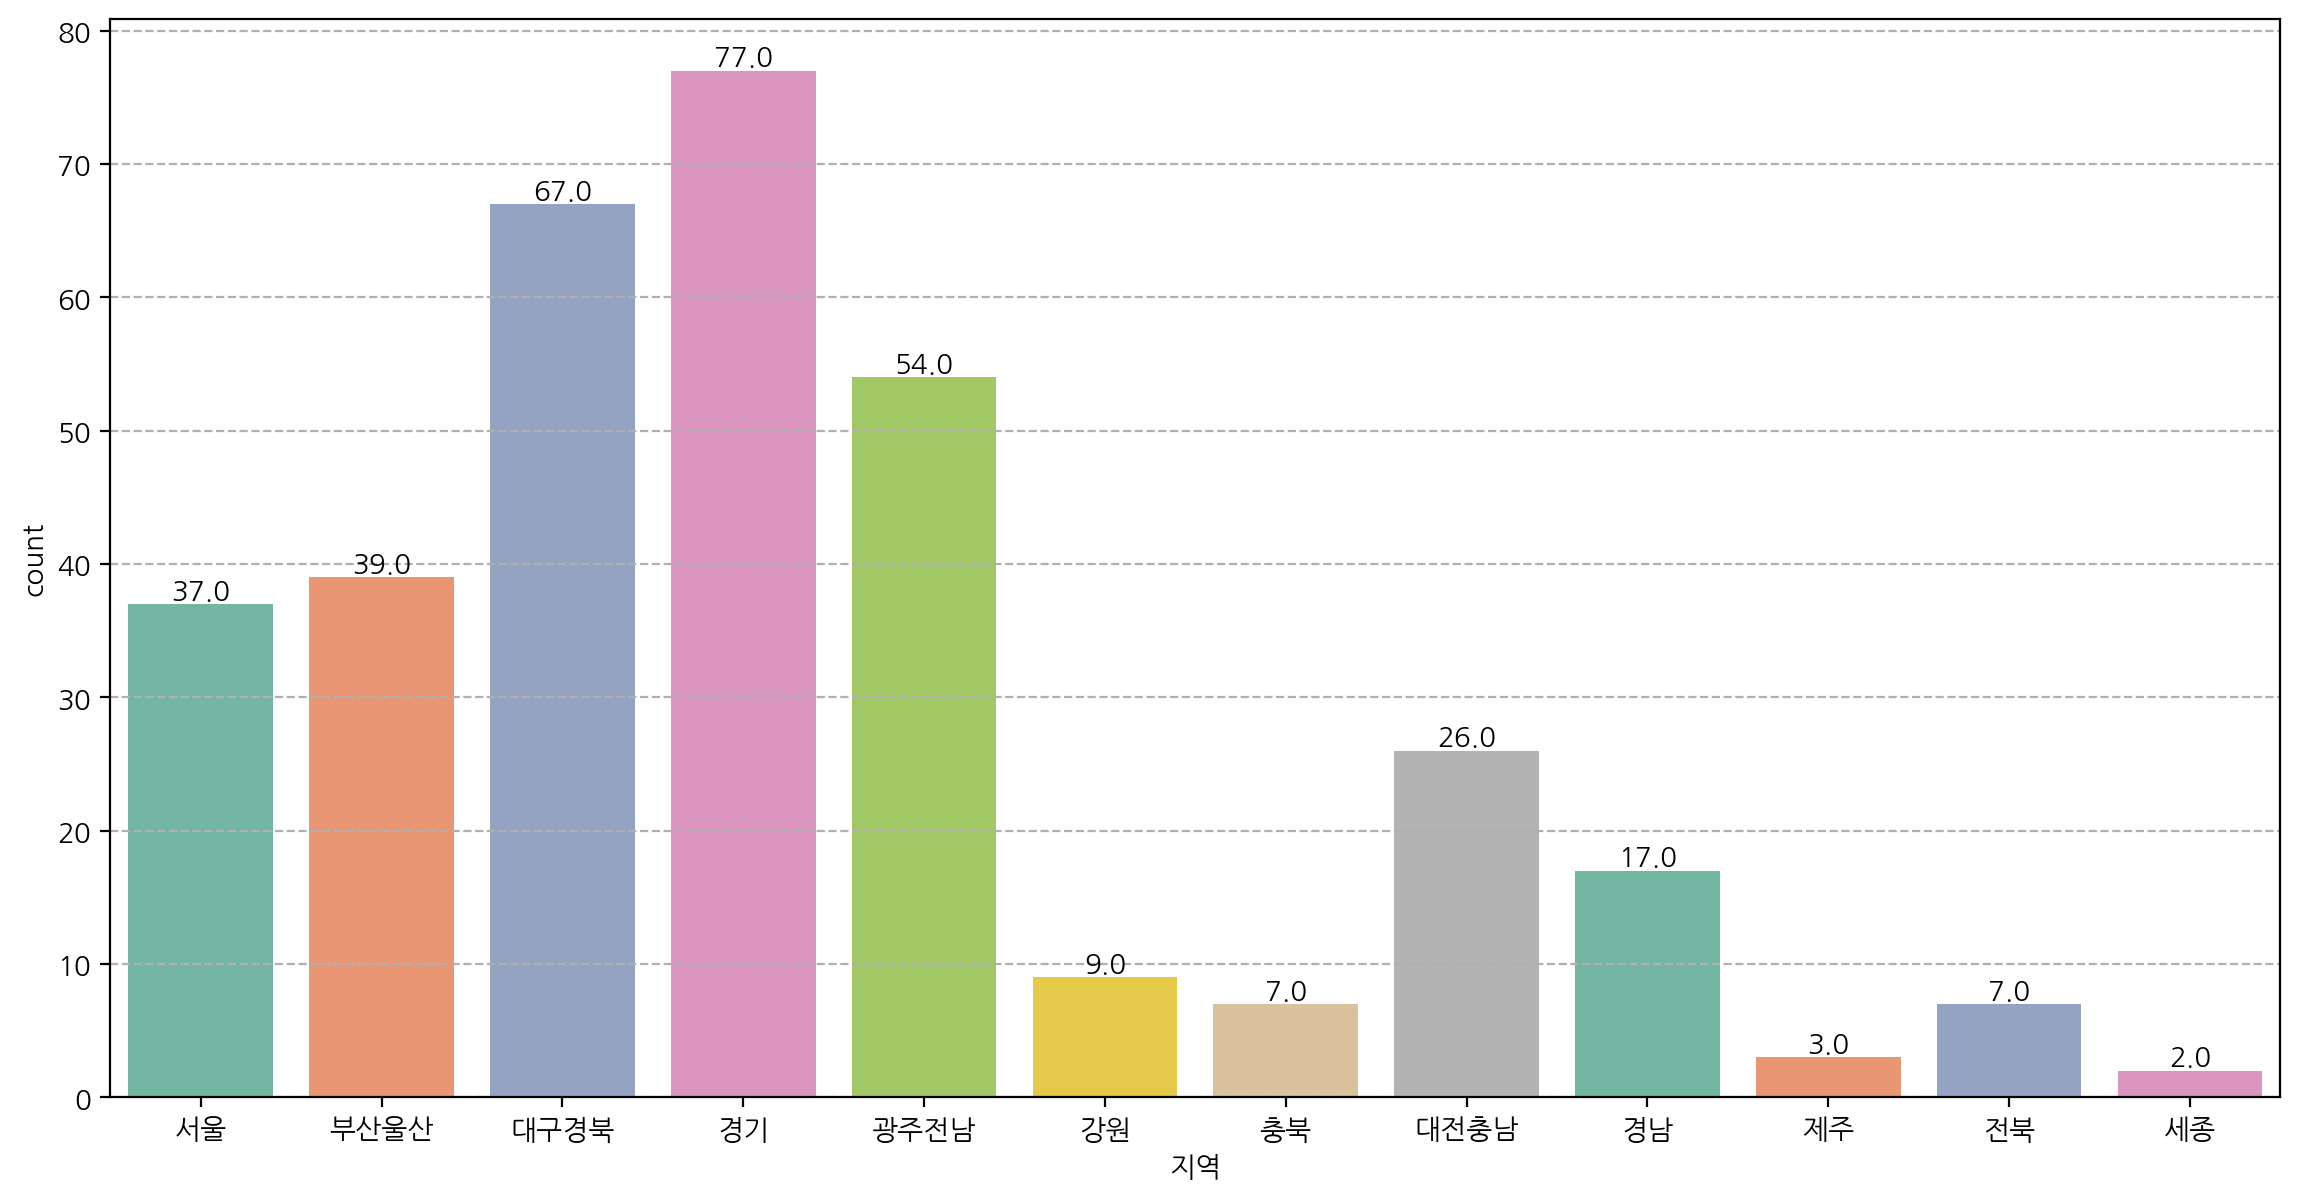

In [47]:
apart_anls2('지역')


#### 2) 건물형태

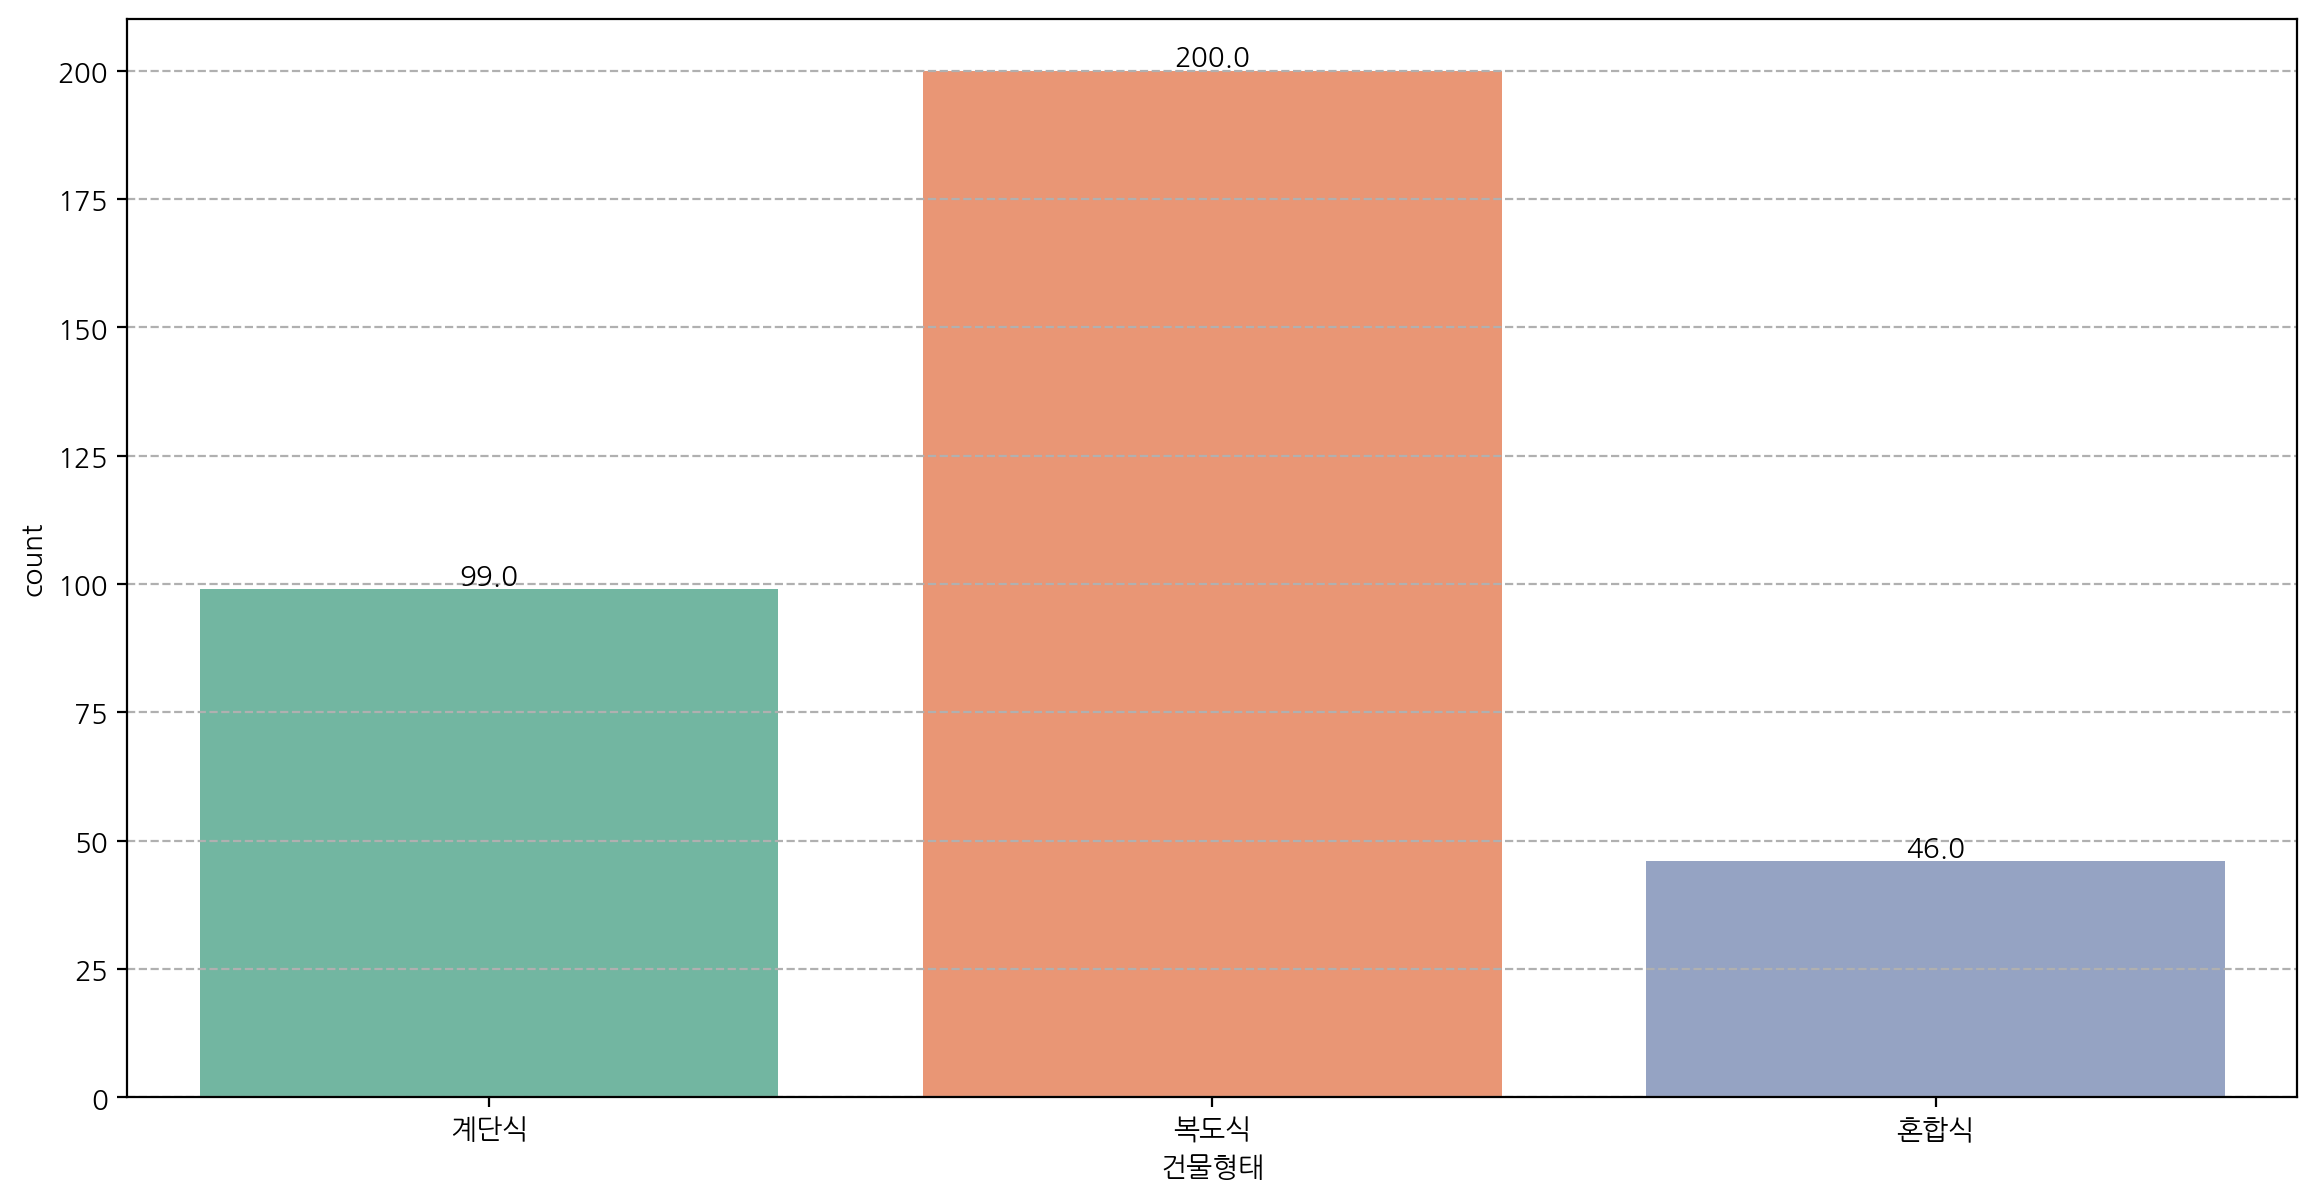

In [49]:
apart_anls2('건물형태')


#### 3) 난방방식

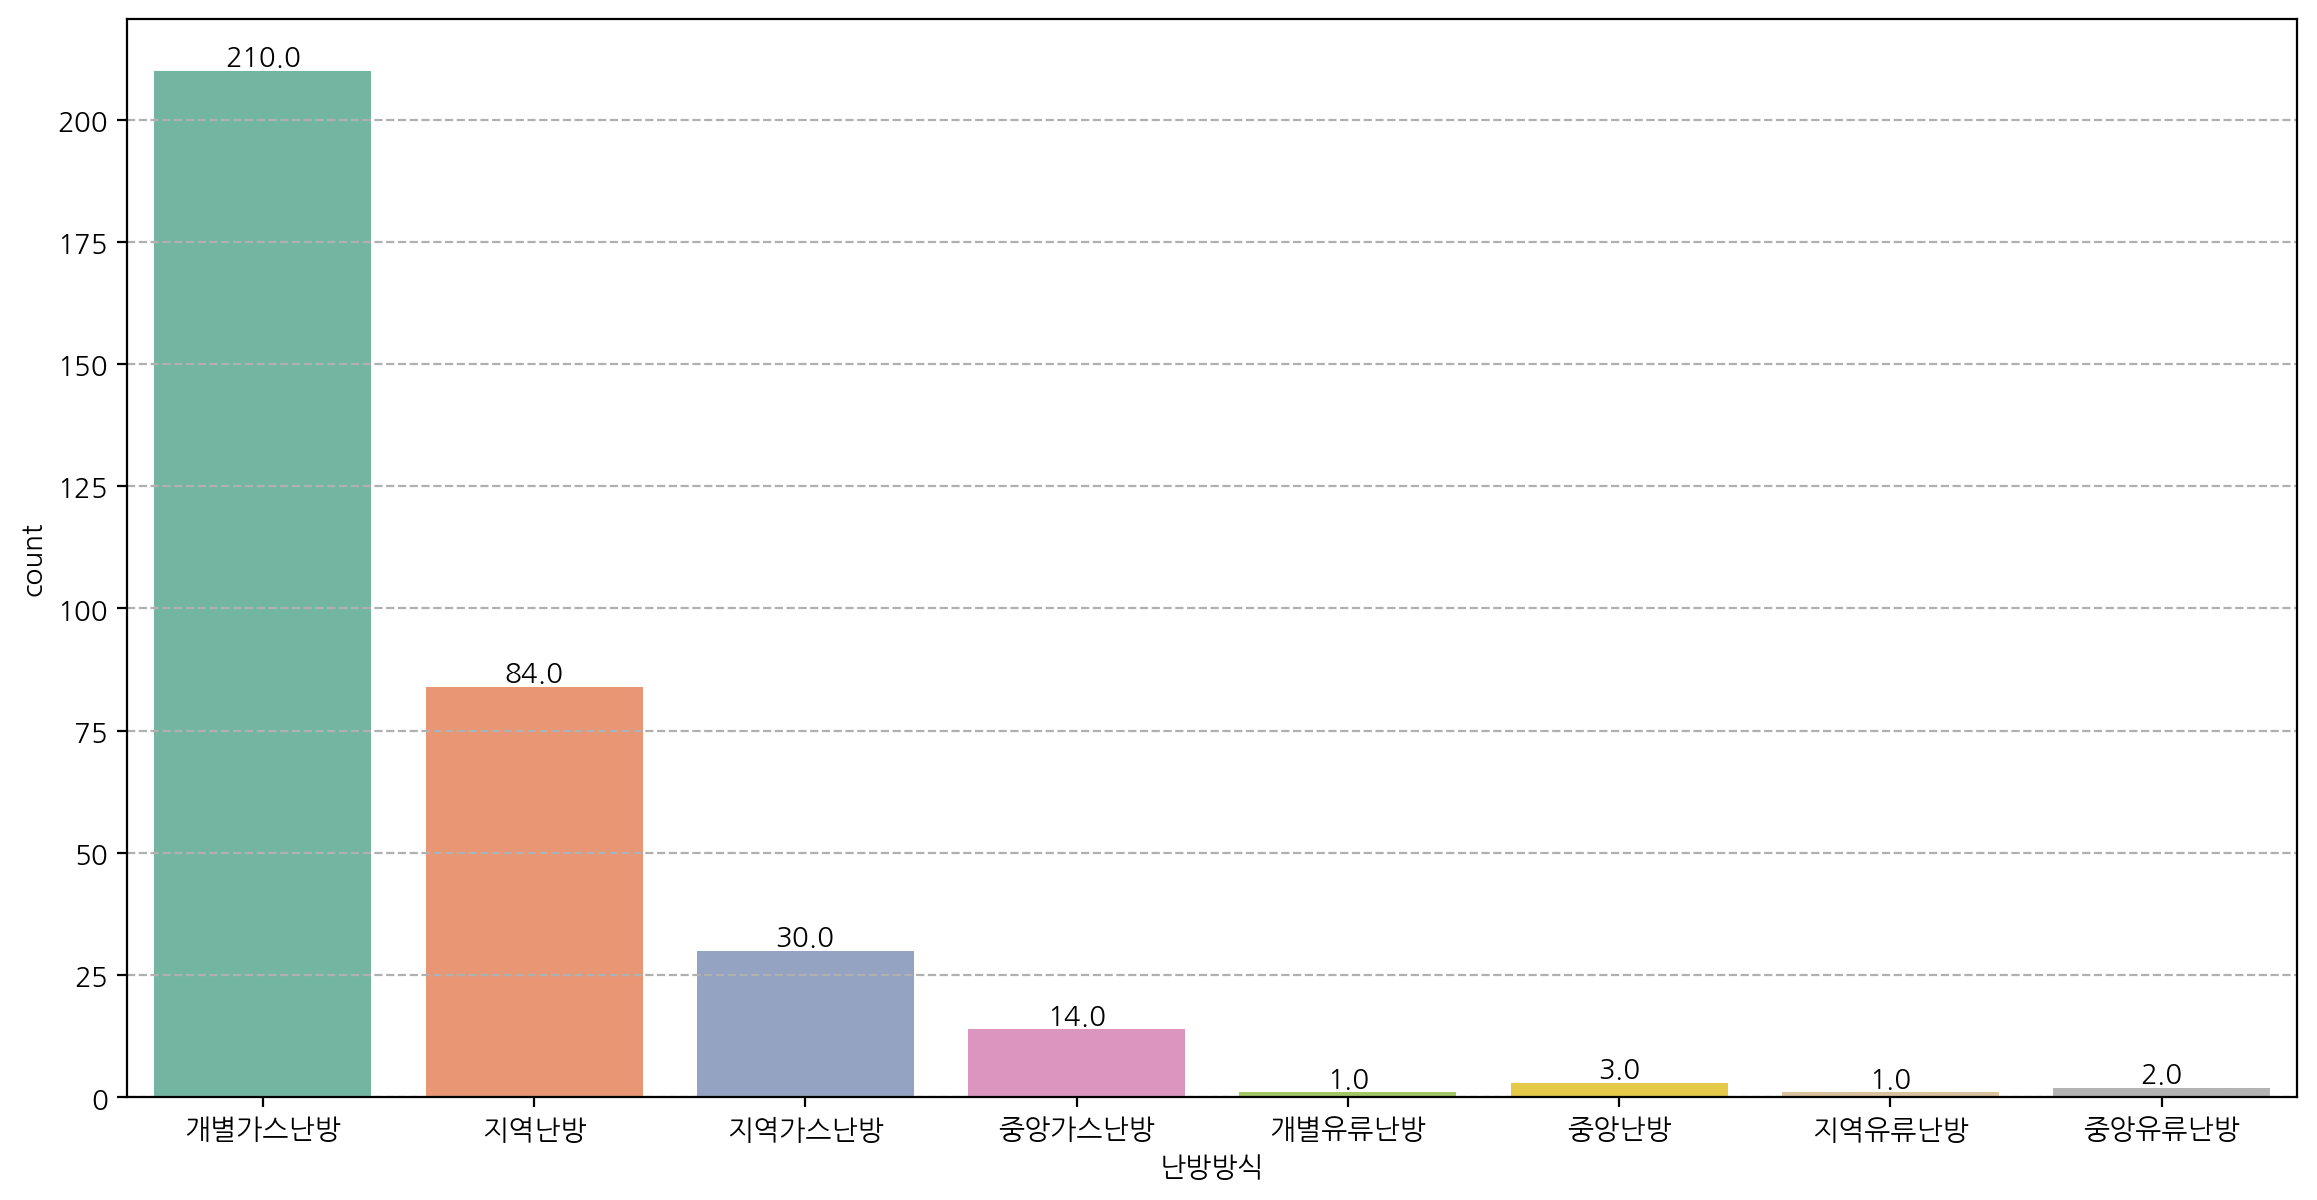

In [51]:
apart_anls2('난방방식')

#### 4) 승강기설치여부

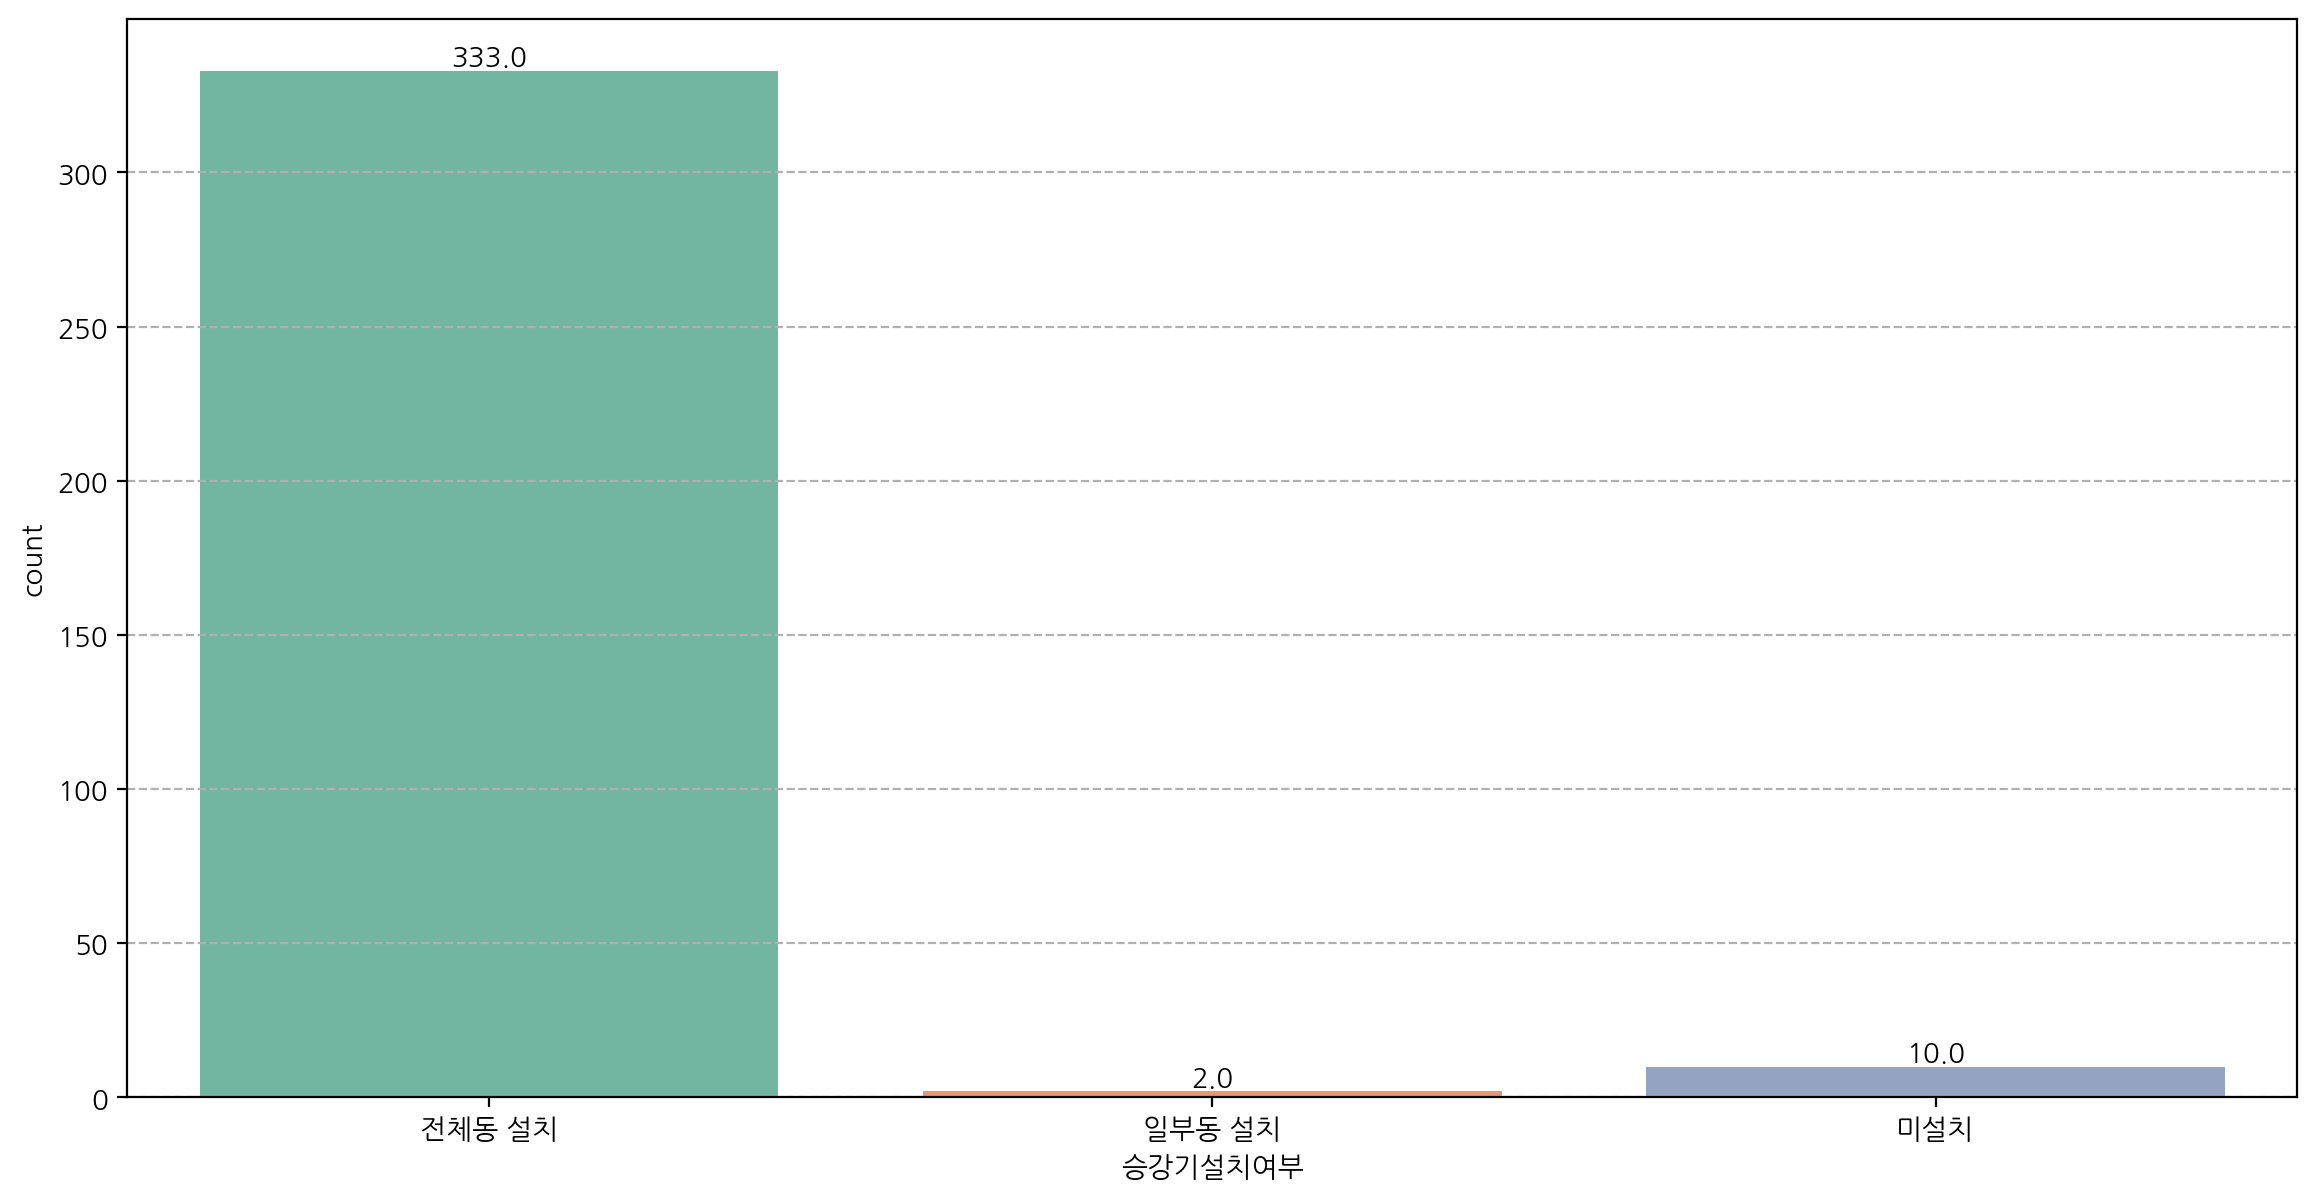

In [53]:
apart_anls2('승강기설치여부')


#### 5) 전용면적구간

- 전용면적구간은 pd.melt() 함수를 사용해 pivot을 해제하여 전용면적구간별 세대수를 분석합니다.

In [55]:
apart.head()

,단지코드,총세대수,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,1030,3040,4050,5060,6070,7080,80200,임대보증금,임대료
0,C0001,78,서울,2013,계단식,개별가스난방,전체동 설치,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,C0002,35,서울,2013,복도식,개별가스난방,전체동 설치,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,C0003,88,서울,2013,계단식,개별가스난방,전체동 설치,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,C0004,477,서울,2014,복도식,지역난방,전체동 설치,943,47058.9273,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,C0006,15,서울,2013,복도식,개별가스난방,전체동 설치,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333


       단지코드 전용면적구간   세대수
1     C0002   1030    35
4     C0006   1030    15
125   C0137   1030    26
137   C0149   1030    32
138   C0150   1030  1166
...     ...    ...   ...
2143  C0081  80200    35
2145  C0083  80200    68
2146  C0086  80200    48
2147  C0087  80200   477
2148  C0088  80200   126

[660 rows x 3 columns]


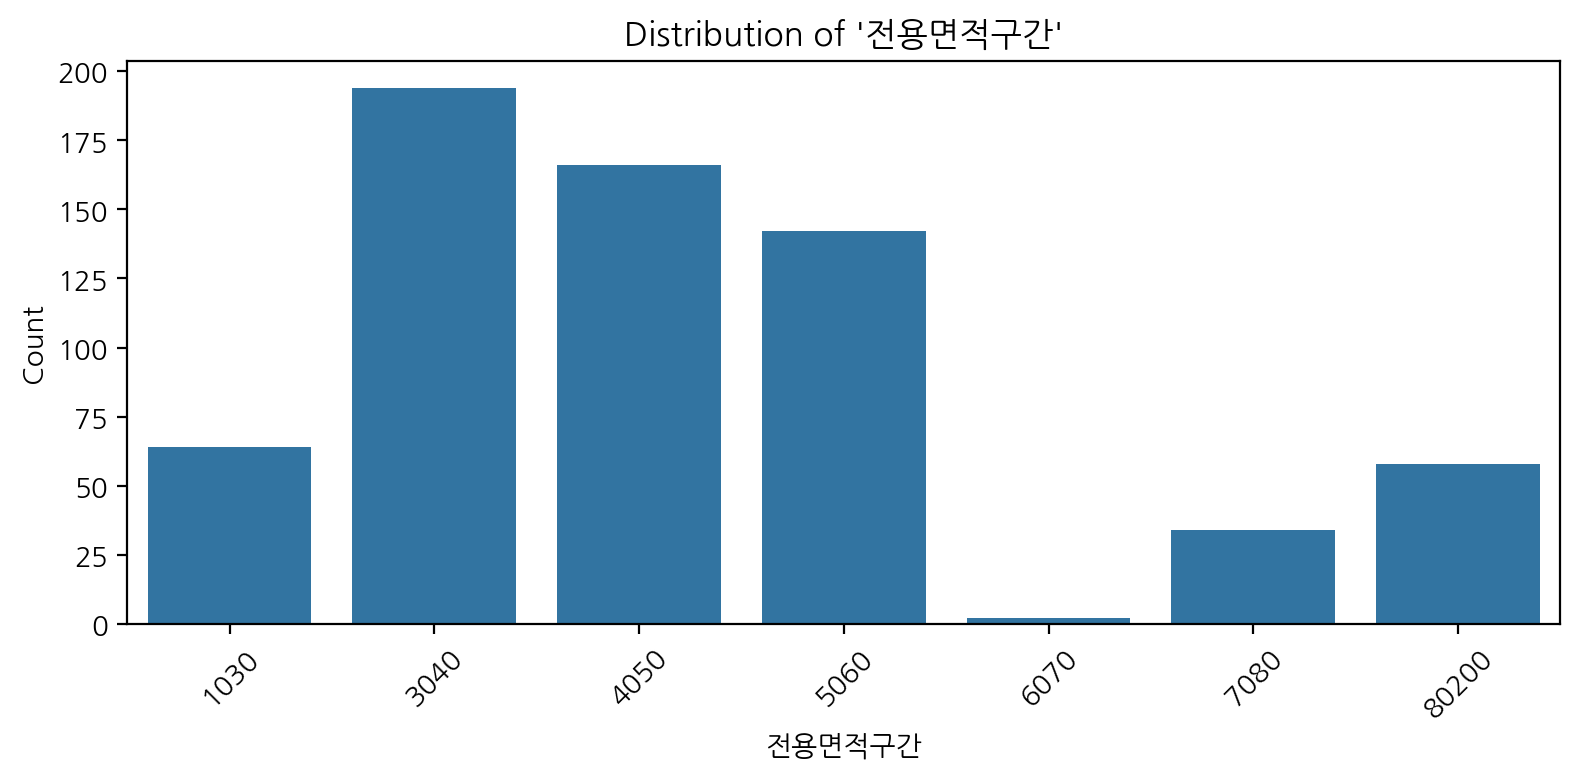

In [56]:
labels = ['1030', '3040', '4050', '5060', '6070', '7080', '80200']
apart_melted = pd.melt(apart, id_vars=['단지코드'], value_vars=labels, var_name='전용면적구간', value_name='세대수')

# '세대수'가 0이 아닌 행만 필터링
apart_filtered = apart_melted[apart_melted['세대수'] > 0]

# 결과 출력
print(apart_filtered)

plot_categori('전용면적구간',apart_filtered)

## 4. 이변량 분석

- 숫자형 변수들 간의 상관관계를 분석합니다.
- 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
- 볌주형 변수 → 실차량수 관계를 분석합니다.

### (1) 숫자형 변수들 간의 상관관계

- 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
- 숫자형 변수들 간의 상관관계를 df.corr() 메서드와 sns.heatmap() 함수 등을 사용해 시각화 합니다.

In [59]:
apart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   단지코드     345 non-null    object 
 1   총세대수     345 non-null    int64  
 2   지역       345 non-null    object 
 3   준공연도     345 non-null    int64  
 4   건물형태     345 non-null    object 
 5   난방방식     345 non-null    object 
 6   승강기설치여부  345 non-null    object 
 7   실차량수     345 non-null    int64  
 8   총면적      345 non-null    float64
 9   1030     345 non-null    int64  
 10  3040     345 non-null    int64  
 11  4050     345 non-null    int64  
 12  5060     345 non-null    int64  
 13  6070     345 non-null    int64  
 14  7080     345 non-null    int64  
 15  80200    345 non-null    int64  
 16  임대보증금    345 non-null    float64
 17  임대료      345 non-null    float64
dtypes: float64(3), int64(10), object(5)
memory usage: 48.6+ KB


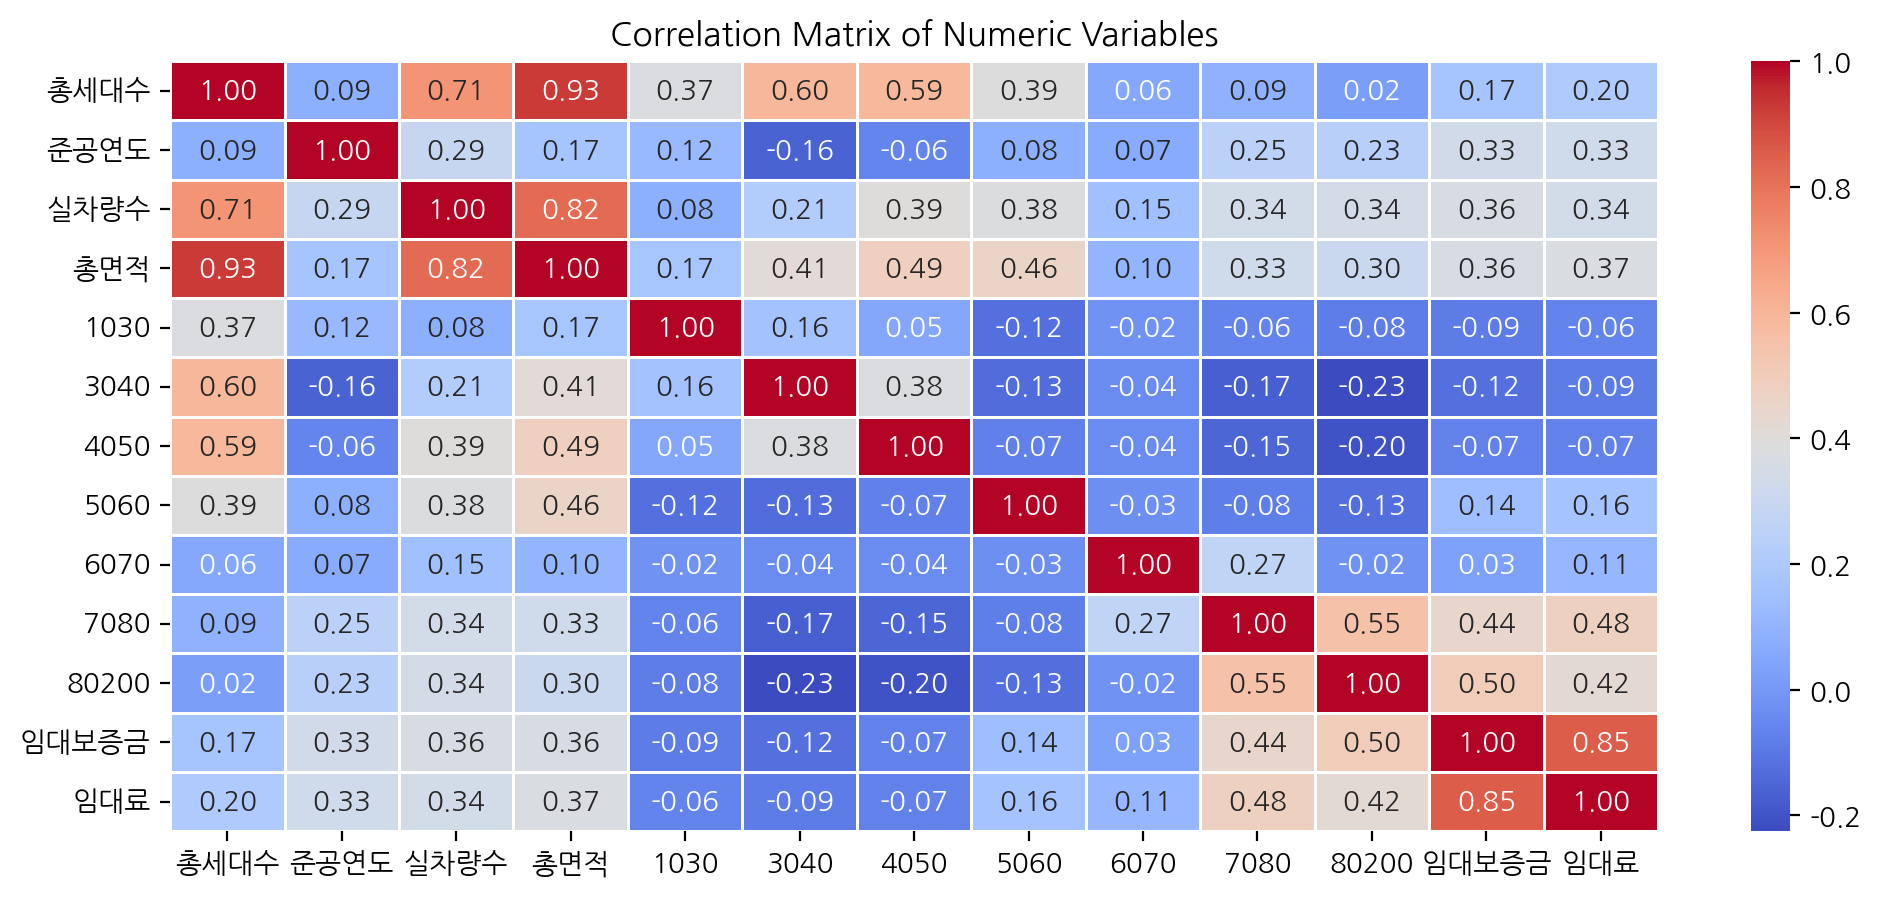

실차량수     1.000000
총면적      0.822183
총세대수     0.712475
4050     0.392296
5060     0.381746
임대보증금    0.361867
80200    0.340284
7080     0.339168
임대료      0.337066
준공연도     0.287266
3040     0.211618
6070     0.151615
1030     0.077284
Name: 실차량수, dtype: float64


In [60]:
corr_matrix = apart.corr(numeric_only=True)

plt.figure(figsize=(12,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

# '실차량수'와 다른 숫자형 변수들 간의 상관관계 계산 및 출력
vehicle_corr = corr_matrix['실차량수'].sort_values(ascending=False)
print(vehicle_corr)

In [61]:
apart[['총세대수','준공연도','실차량수','총면적','1030','3040','4050','5060','6070','7080','80200','임대보증금','임대료']].corr()


,총세대수,준공연도,실차량수,총면적,1030,3040,4050,5060,6070,7080,80200,임대보증금,임대료
총세대수,1.000000,0.085396,0.712475,0.927286,0.373339,0.597253,0.590412,0.387626,0.056001,0.092164,0.021211,0.172154,0.203985
준공연도,0.085396,1.000000,0.287266,0.171747,0.120319,-0.161153,-0.058694,0.079040,0.066059,0.248191,0.229966,0.331838,0.325513
실차량수,0.712475,0.287266,1.000000,0.822183,0.077284,0.211618,0.392296,0.381746,0.151615,0.339168,0.340284,0.361867,0.337066
총면적,0.927286,0.171747,0.822183,1.000000,0.174025,0.409823,0.487128,0.457999,0.102296,0.327435,0.304440,0.361495,0.368626
1030,0.373339,0.120319,0.077284,0.174025,1.000000,0.161440,0.047927,-0.124520,-0.016124,-0.063058,-0.084182,-0.087044,-0.062674
3040,0.597253,-0.161153,0.211618,0.409823,0.161440,1.000000,0.376689,-0.132525,-0.043100,-0.168550,-0.225013,-0.121694,-0.086248
4050,0.590412,-0.058694,0.392296,0.487128,0.047927,0.376689,1.000000,-0.073910,-0.038574,-0.150853,-0.201384,-0.068919,-0.067401
5060,0.387626,0.079040,0.381746,0.457999,-0.124520,-0.132525,-0.073910,1.000000,-0.029779,-0.078286,-0.125007,0.141206,0.164231
6070,0.056001,0.066059,0.151615,0.102296,-0.016124,-0.043100,-0.038574,-0.029779,1.000000,0.265453,-0.016725,0.032534,0.114207
7080,0.092164,0.248191,0.339168,0.327435,-0.063058,-0.168550,-0.150853,-0.078286,0.265453,1.000000,0.550601,0.444749,0.480862


### (2) 숫자형 변수 → 실차량수

- 상관계수가 높은 상위 3~5개 숫자형 변수와 실차량수 관계를 산점도를 시각화해 분석합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [63]:
# 함수 만들기
def pearnson(name):
    apart_s = pd.DataFrame()
    apart_s[name] = apart[name]
    apart_s['실차량수']=apart['실차량수']                   #임대료나 임대보증금이 0인 경우는 베재한다(임대불가)
    apart_s = apart_s.loc[apart_s[name] != 0]
    sns.scatterplot(x=apart_s[name],y=apart_s['실차량수'])
    plt.show()
    print(spst.pearsonr(apart_s[name],apart_s['실차량수']))
    


#### 1) 변수이름 : 총세대수

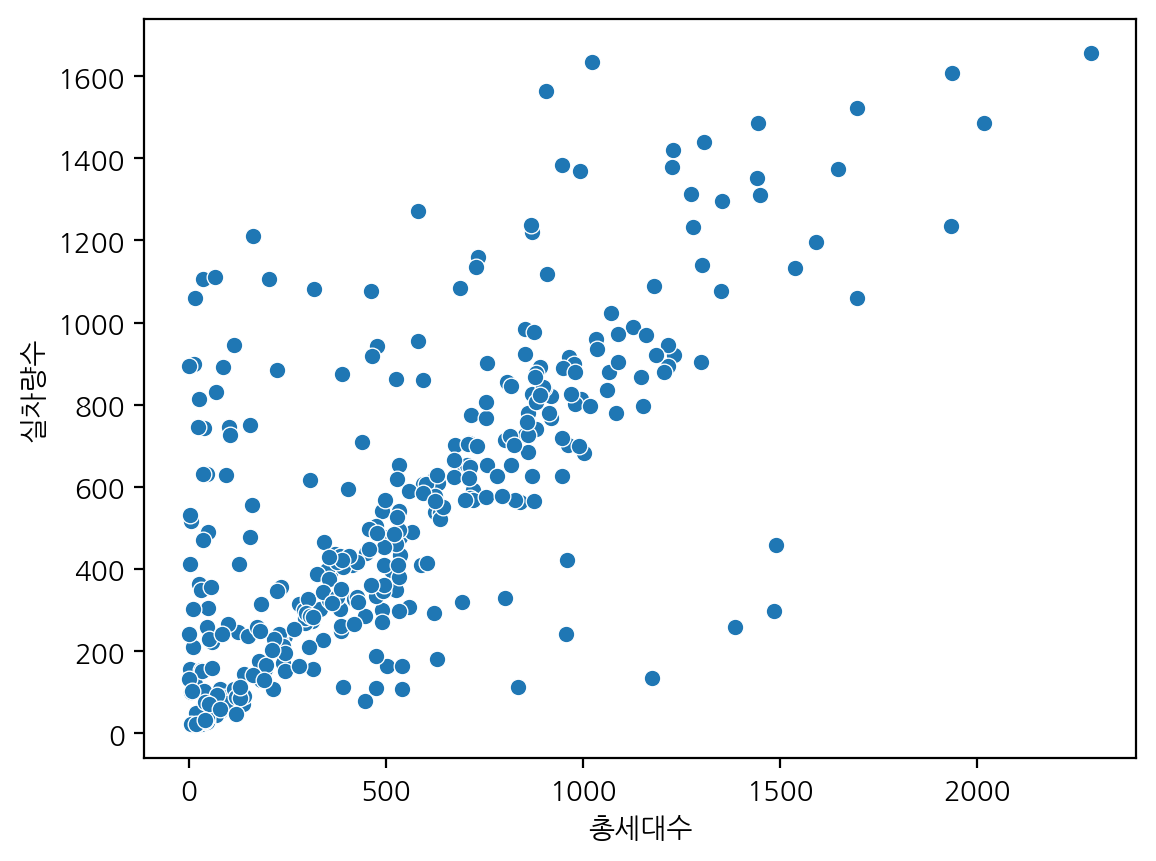

PearsonRResult(statistic=0.7124746462088557, pvalue=1.0221045732952228e-54)


In [65]:
pearnson('총세대수')


In [66]:
# 총 세대수와 실차량수는 높은 양의 상관관계를 보이면 p-value 또한 매우 낮다(대립가설 채택)

#### 2) 변수이름 : 임대보증금

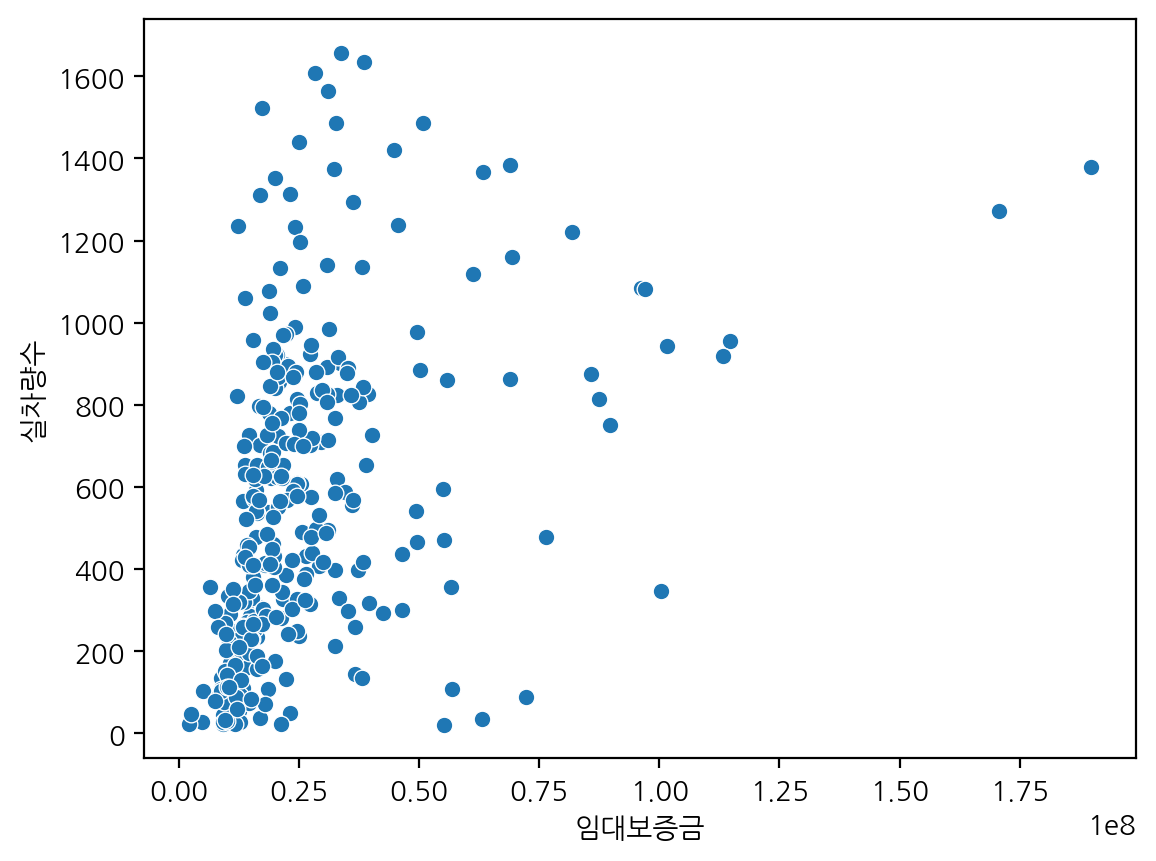

PearsonRResult(statistic=0.4079111294062694, pvalue=8.097703107254295e-14)


In [68]:
pearnson('임대보증금')


#### 3) 변수이름 : 임대로

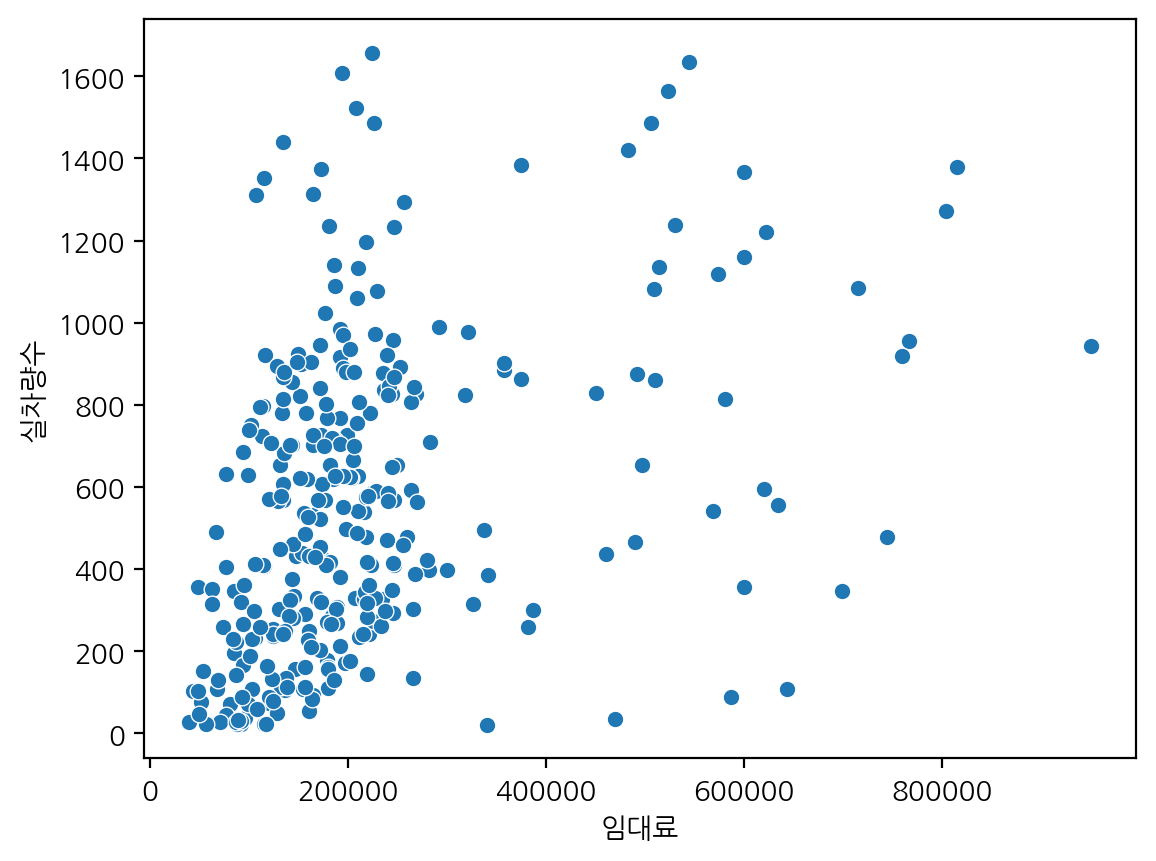

PearsonRResult(statistic=0.3910272168836082, pvalue=9.911444481281966e-13)


In [70]:
pearnson('임대료')


#### 4) 변수이름 : 전용면적_60_90	

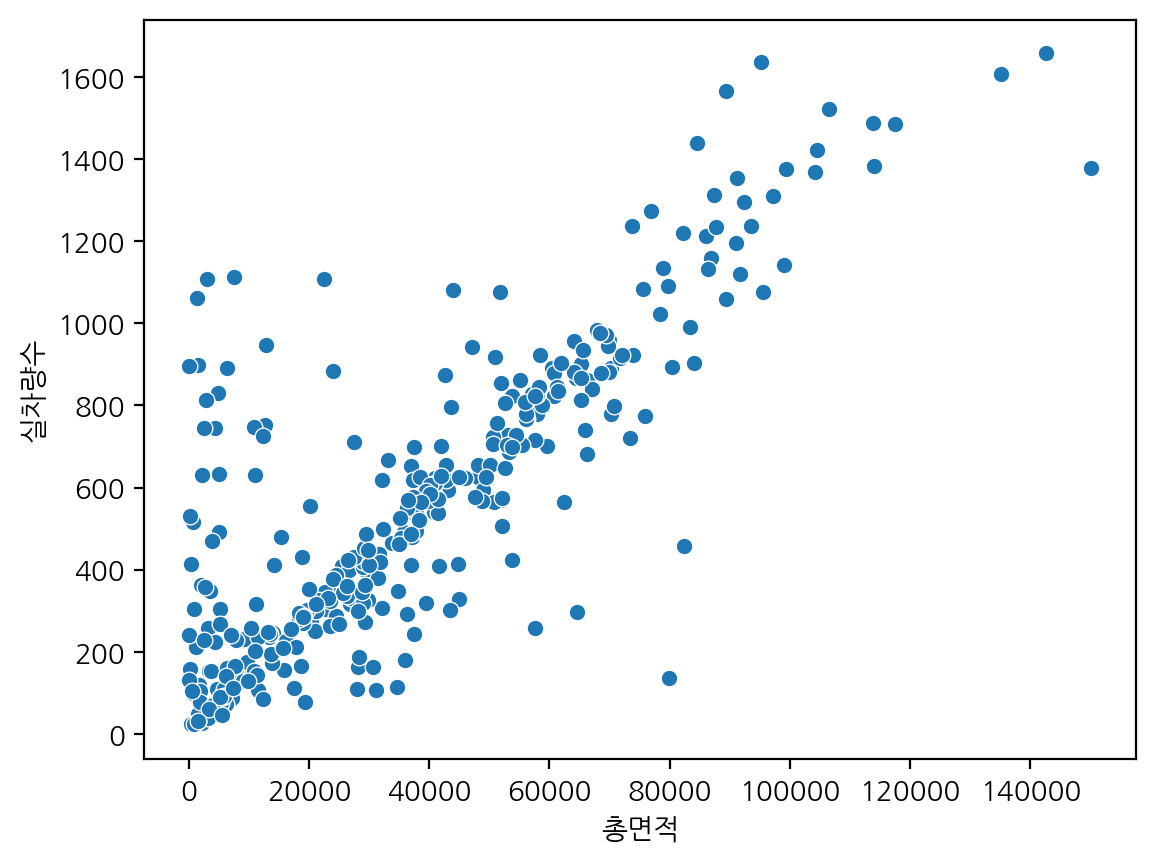

PearsonRResult(statistic=0.8221825549027681, pvalue=6.032798759323943e-86)


In [72]:
pearnson('총면적')


#### 5) 변수이름

### (3) 범주형 변수 → 실차량수

- 범주형 변수 → 실차량수 관계를 분석합니다.
- 대상: '지역', '준공연도', '건물형태', '난방방식', '승강기설치여부'
- 범줏값 별 실차량수 평균을 막대그래프로 시각화해 분석합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [75]:
# 함수 만들기
def Categorical(name):
    sns.barplot(x=apart[name],y=apart['실차량수'])
    plt.xticks(rotation=45)
    plt.show()

#### 1) 지역

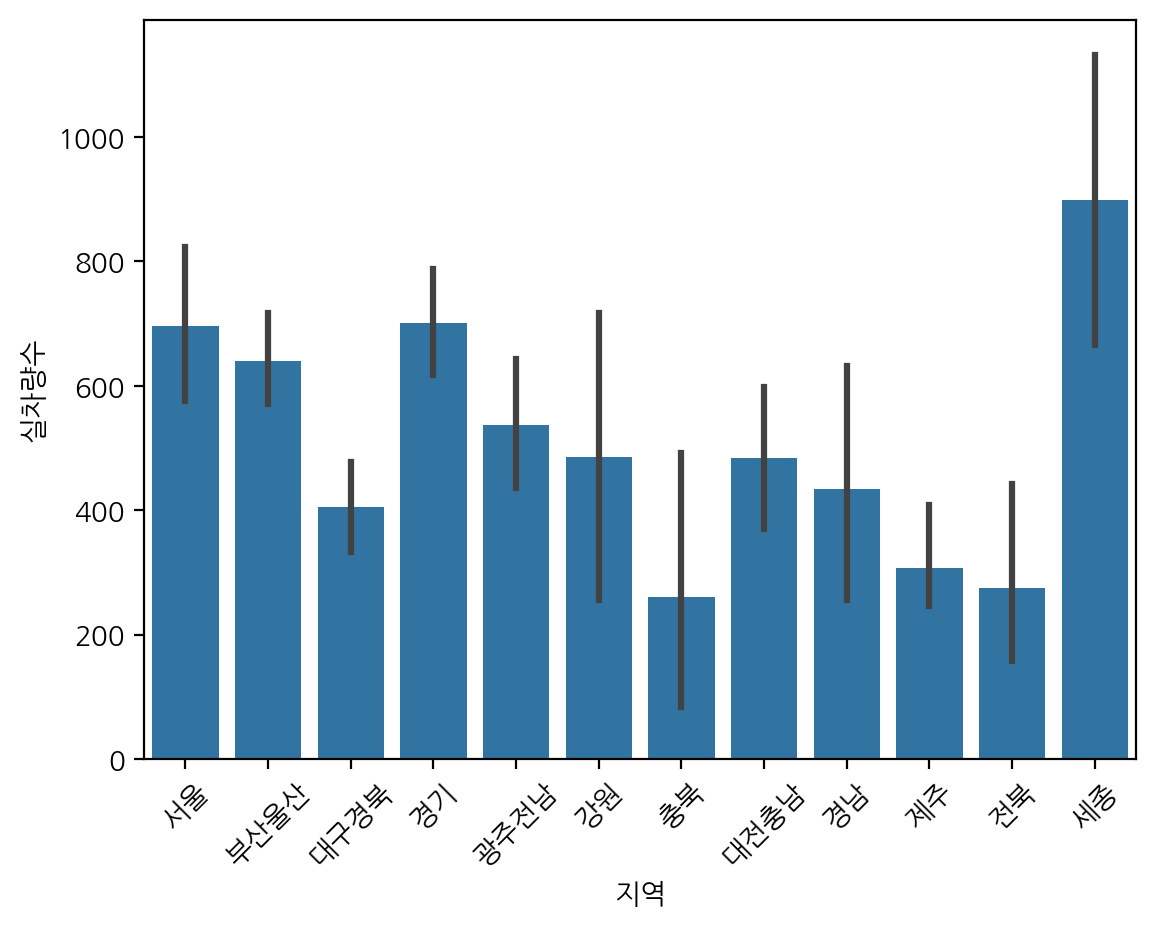

F_onewayResult(statistic=4.451857733965143, pvalue=2.8660069638343555e-06)

In [77]:
Categorical('지역')
S = apart.loc[apart['지역']=='서울','실차량수']
B = apart.loc[apart['지역']=='부산울산','실차량수']
D = apart.loc[apart['지역']=='대구경북','실차량수']
K = apart.loc[apart['지역']=='경기','실차량수']
G = apart.loc[apart['지역']=='광주전남','실차량수']
KA = apart.loc[apart['지역']=='강원','실차량수']
C = apart.loc[apart['지역']=='충북','실차량수']
DA = apart.loc[apart['지역']=='대전충남','실차량수']
KY = apart.loc[apart['지역']=='경남','실차량수']
JE = apart.loc[apart['지역']=='제주','실차량수']
J = apart.loc[apart['지역']=='전북','실차량수']
SE = apart.loc[apart['지역']=='세종','실차량수']
spst.f_oneway(S,B,D,K,G,KA,C,DA,KY,JE,J,SE)

#### 2) 준공연도

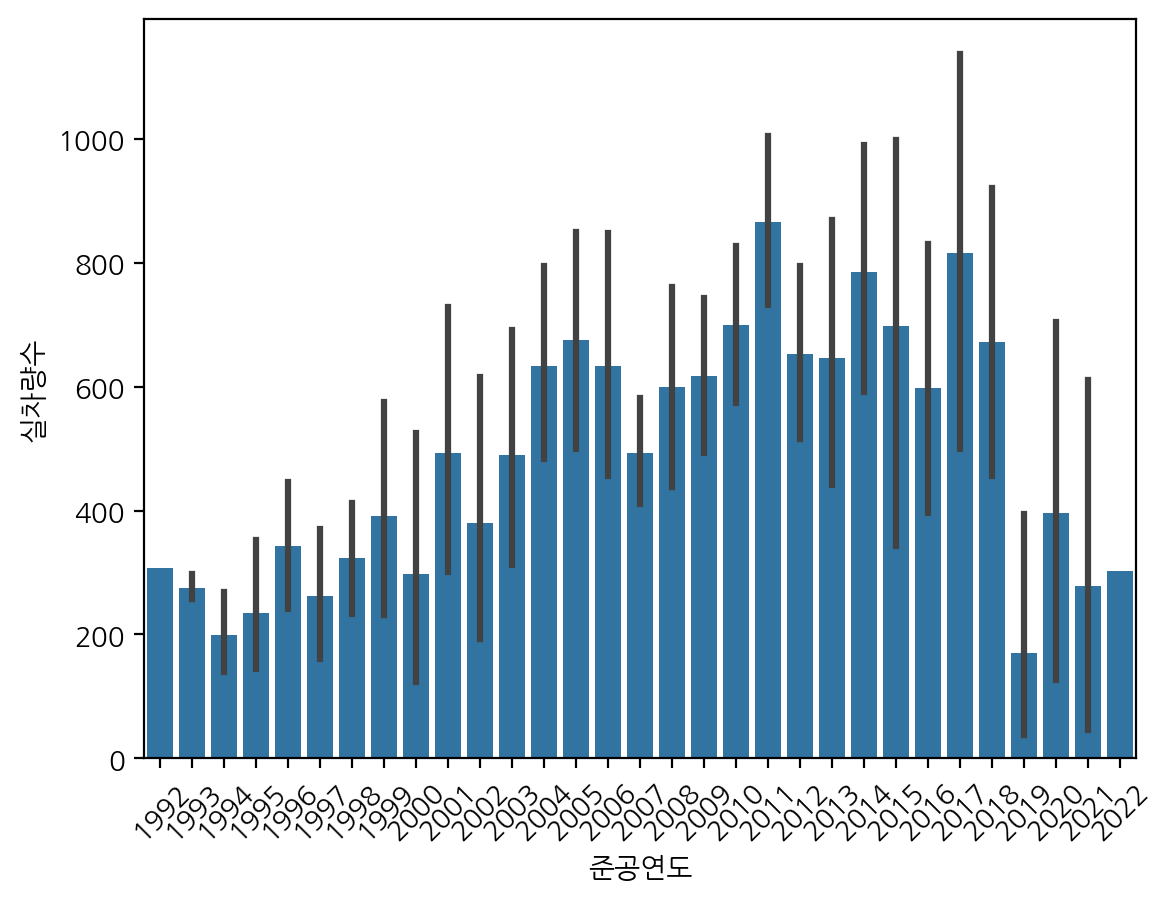

In [79]:
Categorical('준공연도')


#### 3) 건물형태

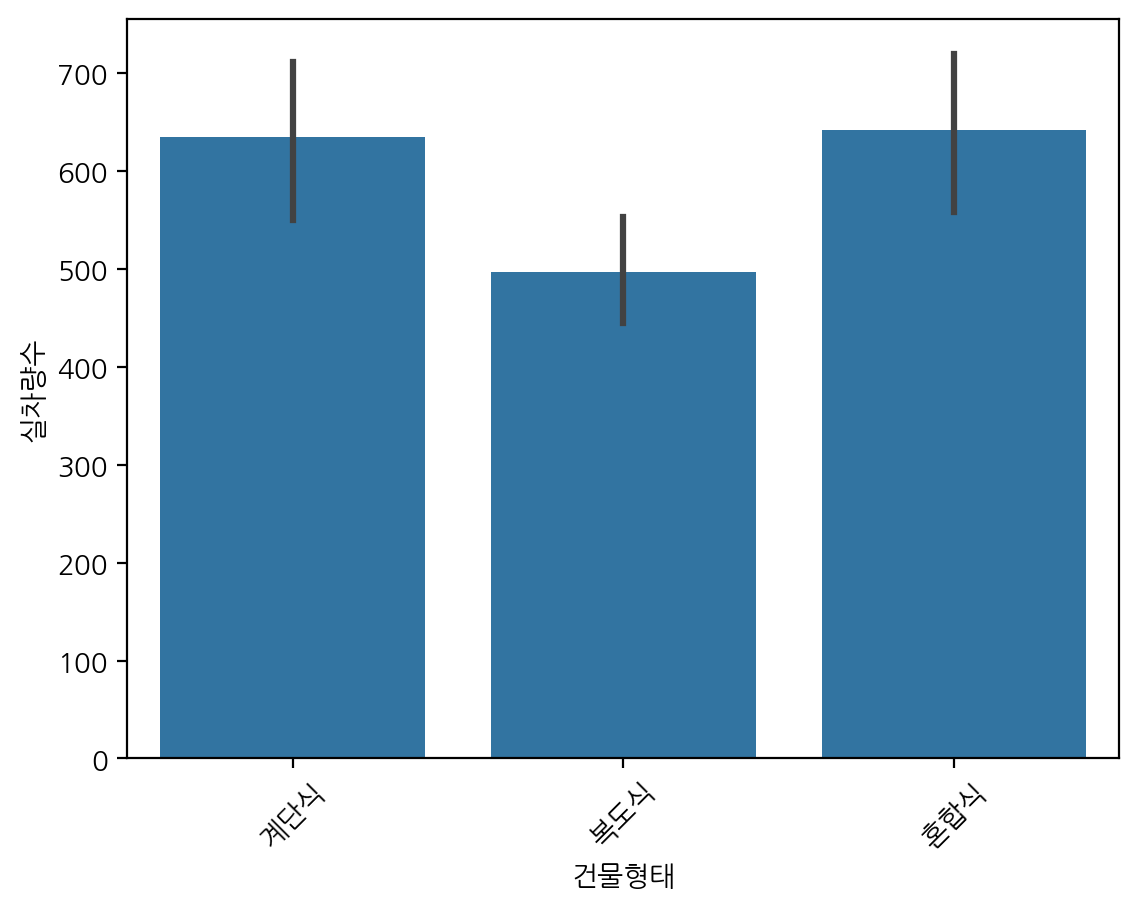

In [81]:
Categorical('건물형태')


#### 4) 난방방식

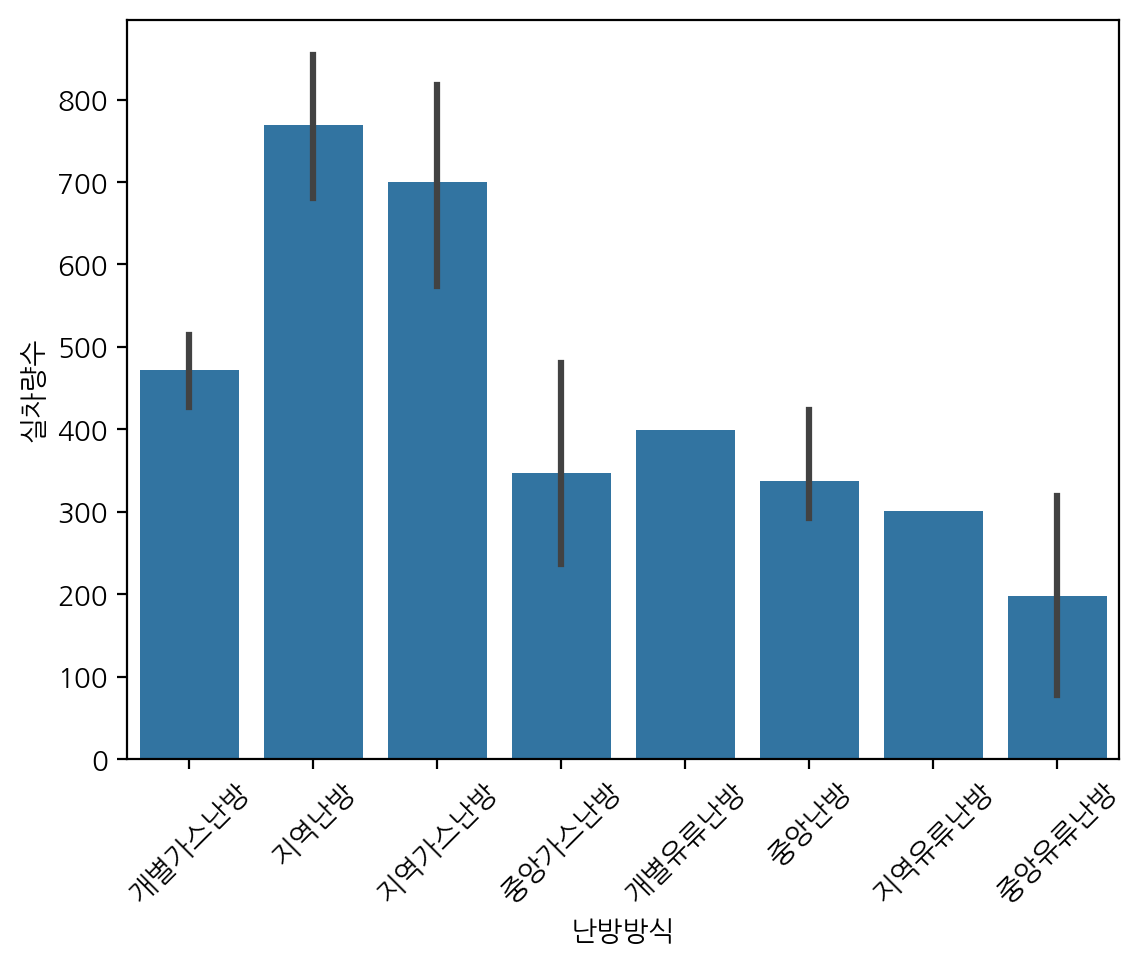

In [83]:
Categorical('난방방식')


#### 5) 승강기설치여부

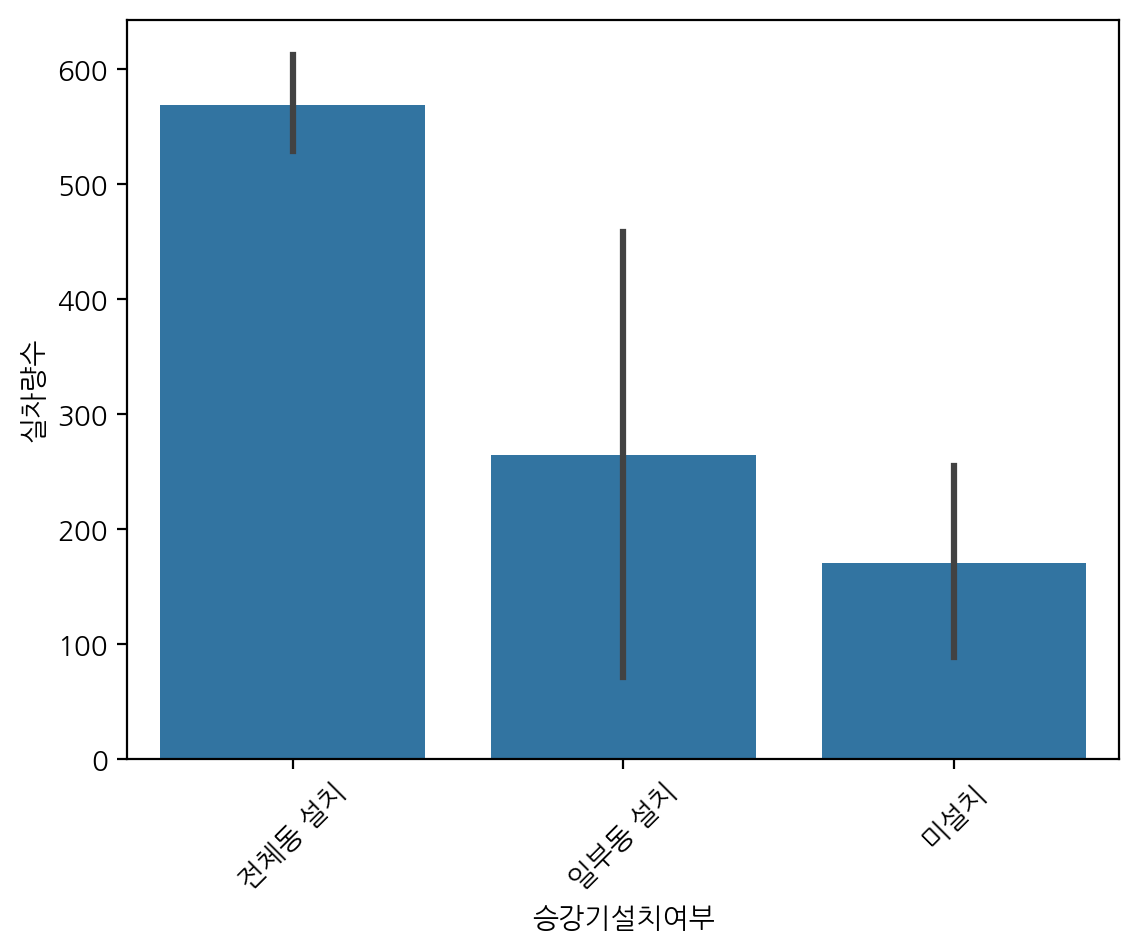

In [85]:
Categorical('승강기설치여부')


## 5. 추가 전처리

- '난방방식', '승강기설치여부' 두 변수에 대해서 적은 수의 범주로 묶는 작업을 진행합니다.
- '단지코드'는 개별적인 값이므로 예측과 관련이 없으니 제거합니다.
- '지역' 변수는 지역별 특성을 고려하기에는 너무 세분화 되어 있고, 특징으로 통합하기 어려우므로 제거합니다.

### (1) 난방방식

- '난방방식' 변수의 값을 다음과 같이 변경하여 세 개의 범줏값만 갖게 합니다.
    - 개별가스난방 → 개별
    - 개별유류난방 → 개별
    - 지역난방 → 지역
    - 지역가스난방 → 지역
    - 지역유류난방 → 지역
    - 중앙가스난방 → 중앙
    - 중앙난방 → 중앙
    - 중앙유류난방 → 중앙

In [88]:
apart['난방방식'] = np.where(((apart['난방방식']=='개별가스난방') | (apart['난방방식']=='개별유류난방')) , '개별',
                        np.where(((apart['난방방식']=='지역난방') | (apart['난방방식']=='지역가스난방') | (apart['난방방식']=='지역유류난방')),'지역','중앙'))

apart

,단지코드,총세대수,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,1030,3040,4050,5060,6070,7080,80200,임대보증금,임대료
0,C0001,78,서울,2013,계단식,개별,전체동 설치,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,C0002,35,서울,2013,복도식,개별,전체동 설치,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,C0003,88,서울,2013,계단식,개별,전체동 설치,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,C0004,477,서울,2014,복도식,지역,전체동 설치,943,47058.9273,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,C0006,15,서울,2013,복도식,개별,전체동 설치,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,C0354,1485,대전충남,1993,복도식,중앙,전체동 설치,298,64622.2500,1181,298,0,6,0,0,0,7.595571e+06,104975.714286
341,C1354,1386,대전충남,1993,복도식,중앙,전체동 설치,258,57616.8100,1071,298,0,17,0,0,0,8.092875e+06,111848.750000
342,C0356,956,경기,1994,복도식,지역,전체동 설치,243,37398.7200,956,0,0,0,0,0,0,9.931000e+06,134540.000000
343,C0358,120,강원,2020,복도식,개별,전체동 설치,47,5581.8024,66,54,0,0,0,0,0,2.515500e+06,50040.000000


### (2) 승강기설치여부

- '승강기설치여부' 변수의 값을 다음과 같이 변경하여 0, 1 값을 갖게 합니다.
    - 전체동 설치 → 1
    - 일부동 설치 → 0
    - 미설치 → 0

In [90]:
apart['승강기설치여부'] = np.where(apart['승강기설치여부']=='전체동 설치',1,0)

apart

,단지코드,총세대수,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,1030,3040,4050,5060,6070,7080,80200,임대보증금,임대료
0,C0001,78,서울,2013,계단식,개별,1,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,C0002,35,서울,2013,복도식,개별,1,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,C0003,88,서울,2013,계단식,개별,1,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,C0004,477,서울,2014,복도식,지역,1,943,47058.9273,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,C0006,15,서울,2013,복도식,개별,1,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,C0354,1485,대전충남,1993,복도식,중앙,1,298,64622.2500,1181,298,0,6,0,0,0,7.595571e+06,104975.714286
341,C1354,1386,대전충남,1993,복도식,중앙,1,258,57616.8100,1071,298,0,17,0,0,0,8.092875e+06,111848.750000
342,C0356,956,경기,1994,복도식,지역,1,243,37398.7200,956,0,0,0,0,0,0,9.931000e+06,134540.000000
343,C0358,120,강원,2020,복도식,개별,1,47,5581.8024,66,54,0,0,0,0,0,2.515500e+06,50040.000000


In [91]:
apart['승강기설치여부'].value_counts()

승강기설치여부
1    333
0     12
Name: count, dtype: int64

### (3) 단지코드, 지역 제거

- '단지코드', '지역' 변수를 제거합니다.

In [93]:
apart.drop(['단지코드','지역'],axis=1,inplace= True)


- 최종 데이터를 확인합니다.

In [95]:

apart

,총세대수,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,1030,3040,4050,5060,6070,7080,80200,임대보증금,임대료
0,78,2013,계단식,개별,1,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,35,2013,복도식,개별,1,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,88,2013,계단식,개별,1,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,477,2014,복도식,지역,1,943,47058.9273,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,15,2013,복도식,개별,1,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,1485,1993,복도식,중앙,1,298,64622.2500,1181,298,0,6,0,0,0,7.595571e+06,104975.714286
341,1386,1993,복도식,중앙,1,258,57616.8100,1071,298,0,17,0,0,0,8.092875e+06,111848.750000
342,956,1994,복도식,지역,1,243,37398.7200,956,0,0,0,0,0,0,9.931000e+06,134540.000000
343,120,2020,복도식,개별,1,47,5581.8024,66,54,0,0,0,0,0,2.515500e+06,50040.000000


## 6. 데이터 셋 저장

- joblib.dump() 함수를 사용하여 최종 데이터 셋을 파일로 저장합니다.
- 파일 이름은 base_data2.pkl로 합니다.

In [145]:
# 파일로 저장
joblib.dump(apart, path+'base_data2.pkl')

['base_data2.pkl']